
#  <span style="color:#9400D3;text-decoration:overline;font-weight:bold"><u> AIML Module Project - ENSEMBLE TECHNIQUES</u></span>


# <span style="color:#9400D3">PROJECT BASED                 

**DOMAIN:** Telecom

**CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

**DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:
 
 * Customers who left within the last month – the column is called Churn

 * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies

 * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges

 * Demographic info about customers – gender, age range, and if they have partners and dependents
 
**PROJECT OBJECTIVE:** Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.

**Steps to the project:** 
1. Import and warehouse data: 
 * Import all the given datasets. Explore shape and size.
 * Merge all datasets onto one and explore final shape and size.


2. Data cleansing:
 * Missing value treatment
 * Convert categorical attributes to continuous using relevant functional knowledge
 * Drop attribute/s if required using relevant functional knowledge
 * Automate all the above steps


3. Data analysis & visualisation: 
 * Perform detailed statistical analysis on the data.
 * Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.


4. Data pre-processing: 
 * Segregate predictors vs target attributes
 * Check for target balancing and fix it if found imbalanced.
 * Perform train-test split.
 * Check if the train and test data have similar statistical characteristics when compared with original data.


5. Model training, testing and tuning:
 * Train and test all ensemble models taught in the learning module.
 * Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
 * Display the classification accuracies for train and test data.
 * Apply all the possible tuning techniques to train the best model for the given data.
 * Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
 * Display and compare all the models designed with their train and test accuracies.
 * Select the final best trained model along with your detailed comments for selecting this model.
 * Pickle the selected model for future use.


6. Conclusion and improvisation: 
 * Write your conclusion on the results.
 * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.
***

### <span style="color:#9400D3">Importing Required Python Modules and Libraries
  Here we are importing all the Libraries and Modules that are needed for whole project in a single cell.

In [1]:
# Libraries for Basic Process 
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# sklearn Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

# Supporting Modules and Libraries
from imblearn.over_sampling import SMOTE
import pickle

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore') 

***
## <span style="color:#9400D3">1. Import and Warehouse Data:

### <span style="color:#9400D3"> * Import all the given Datasets and Explore Shape and Size.
   * Here we are choosing 2nd approach that is, 'Data set for Direct import using Pandas'.
   * We used file "TelcomCustomer-Churn.csv", so there is only one file to operate.
   * If the file fails to load, then a quick check is needed for file name. Make sure that original file name matches with the name which is coded below.
   * The file is in CSV format, if format of original file changes then error in loading files will appear.

In [2]:
# Loading the file and creating dataframe
teledata = pd.read_csv('TelcomCustomer-Churn.csv')

# Getting Shape and Size of data
T = teledata.shape

# Displaying the Dataset
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',T[0],'\n Number of Columns =',T[1],'\n\n\033[1mDataset:-\033[0m')
display(teledata.head())

Dataset consist:-
 Number of Rows    = 7043 
 Number of Columns = 21 

Dataset:-


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### <span style="color:#9400D3"> * Merge all Datasets onto One and Explore Final Shape and Size.

Since we have chosen 2nd approach that is, 'Data set for Direct import using Pandas', we have one one file which includes all the rows and columns. Hence there is no need to merge the data.

In [3]:
# Displaying the Final Dataset
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',T[0],'\n Number of Columns =',T[1],
      '\n\n\033[1mTranspose of Dataset:-\033[0m')
display(teledata.head().T)

Dataset consist:-
 Number of Rows    = 7043 
 Number of Columns = 21 

Transpose of Dataset:-


0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

***
**Key Observations:-**
* Dataset has 7043 Rows and 21 Columns.
***

## <span style="color:#9400D3">2. Data Cleansing:

### Creating Duplicate Dataset for Future Use

This Dataset will be used to Automate the Data Cleansing process.

In [4]:
# Making a copy of original dataset for future use
copy_teledata = teledata.copy()    # for Automation purpose
copy_teledata2 = teledata.copy()   # for comaparison purpose

### <span style="color:#9400D3"> * Missing Value Treatment:

### Checking for Null Values in the Attributes

In [5]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(teledata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0

***
**Key Observations:-**
* There are no Null values observed now in the dataset.
***

### Checking Data Type of Quantitative Attributes

In [6]:
# Getting Quantitative Attributes
qt_data = teledata[['tenure','MonthlyCharges','TotalCharges']]

# Getting Data type of each Quantitative Attribute
QT = qt_data.dtypes.to_frame('Data Type')
QT.index.name = 'Quantitative Attributes'

# Displaying Data type of Quantitative Attributes
print('\n\033[1mData Types of Quantitative Attributes:-')
display(QT)


Data Types of Quantitative Attributes:-


Data Type
Quantitative Attributes          
tenure                      int64
MonthlyCharges            float64
TotalCharges               object

***
**Key Observations:-**
* Here we can observe Attribute 'TotalCharges' has object datatype.
* We need to change its datatype to numerical float.
***

### Converting Datatype of TotalCharges to Numerical Float datatype

In [7]:
# Converting Datatype of TotalCharges to Numerical Float datatype
teledata['TotalCharges'] = pd.to_numeric(teledata['TotalCharges'],errors='coerce')

# Displaying Data type of Quantitative Attributes
print('\n\033[1mData Types of Quantitative Attributes:-')
qt_data = teledata[['tenure','MonthlyCharges','TotalCharges']]
QT = qt_data.dtypes.to_frame('Data Type')
QT.index.name = 'Quantitative Attributes'
display(QT)


Data Types of Quantitative Attributes:-


Data Type
Quantitative Attributes          
tenure                      int64
MonthlyCharges            float64
TotalCharges              float64

***
**Key Observations:-**
* Now the datatype of TotalCharges attribute has changed to float64.
* Now we need to check for Null Values in it.
***

### Checking for Null Values in TotalCharges Attributes after Datatype Conversion

In [8]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(teledata.isnull().sum().to_frame('Null Values')[19:20])


Null Values in the Features:-


Null Values
TotalCharges           11

***
**Key Observations:-**
* Now we have some Null Values here which are to be removed.
***

### Removing Null Values in TotalCharges Attributes after Datatype Conversion

In [9]:
# Dropping Null Values
teledata.dropna(inplace=True)

# Checking for Null Values After Dropping
print('\n\033[1mNull Values in the Features:-')
display(teledata.isnull().sum().to_frame('Null Values')[19:20])

# Displaying Shape and Size of Dataset After Dropping
T = teledata.shape
print('\033[1m\n\nDataset After Dropping Values consist:-\033[0m\n Number of Rows    =',T[0],'\n Number of Columns =',T[1])


Null Values in the Features:-


Null Values
TotalCharges            0



Dataset After Dropping Values consist:-
 Number of Rows    = 7032 
 Number of Columns = 21


***
**Key Observations:-**
* All the Null Values have been Removed.
***

### <span style="color:#9400D3"> * Convert Categorical Attributes to Continuous using relevant Functional Knowledge

### Checking Data Types and Unique Values in every Categorical Attribute

In [10]:
# Getting Categorical Attributes
cat_data = teledata.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'])

# Getting Unique Values in Categorical attributes
CD = cat_data.apply(lambda col: col.unique()).to_frame('Unique Values')
CD['Total Unique Values'] = cat_data.apply(lambda col: col.nunique())
CD['Data Type'] = cat_data.dtypes

# Displaying Unique Values of Categorical attributes
CD.index.name = 'Categorical Attributes'
print('\n\033[1mTable showing Data Types and Unique values of Categorical Attributes:-')
display(CD)


Table showing Data Types and Unique values of Categorical Attributes:-


Unique Values  \
Categorical Attributes                                                      
gender                                                     [Female, Male]   
SeniorCitizen                                                      [0, 1]   
Partner                                                         [Yes, No]   
Dependents                                                      [No, Yes]   
PhoneService                                                    [No, Yes]   
MultipleLines                                 [No phone service, No, Yes]   
InternetService                                    [DSL, Fiber optic, No]   
OnlineSecurity                             [No, Yes, No internet service]   
OnlineBackup                               [Yes, No, No internet service]   
DeviceProtection                           [No, Yes, No internet service]   
TechSupport                                [No, Yes, No internet service]   
StreamingTV                                [No, Yes, No internet service]   
StreamingMovies                            [No, Yes, No internet service]   
Contract                             [Month-to-month, One year, Two year]   
PaperlessBilling                                                [Yes, No]   
PaymentMethod           [Electronic check, Mailed check, Bank transfer...   
Churn                                                           [No, Yes]   

                        Total Unique Values Data Type  
Categorical Attributes                                 
gender                                    2    object  
SeniorCitizen                             2     int64  
Partner                                   2    object  
Dependents                                2    object  
PhoneService                              2    object  
MultipleLines                             3    object  
InternetService                           3    object  
OnlineSecurity                            3    object  
OnlineBackup                              3    object  
DeviceProtection                          3    object  
TechSupport                               3    object  
StreamingTV                               3    object  
StreamingMovies                           3    object  
Contract                                  3    object  
PaperlessBilling                          2    object  
PaymentMethod                             4    object  
Churn                                     2    object

***
**Key Observations:-**
* We have detailed data about unique values in our dataset
* Attribute 'SeniorCitizen' is already in binary form, since its datatype is int64.
* In attribute 'MultipleLines' we have three unique values 
 1. No phone service, 
 2. No, 
 3. Yes. 
 
 Here we need to change the values "No phone service" to "No".
 

* Similarly in attributes 
 * OnlineSecurity,
 * OnlineBackup,
 * DeviceProtection,
 * TechSupport,
 * StreamingTV, 
 * StreamingMovies
 
 we have three unique values,
 1. No,
 2. Yes,
 3. No internet service.
 
 Here we need to change the values "No internet service" to "No".
***

### Converting Categorical Attribute to Continuous form

* Here first we create Replacing data dictionary in order to replace string values of Categorical Attributes with numeric data.
* Replacing data has Categorical attributes which are in object form with subsequent integer values alloted to them.
* Then we Replace the values using replace function. By this we will Convert Categorical Attribute to Continuous form.

In [11]:
# Creating Replacing data
Replace = {'gender':{'Female':0,'Male':1},
           'InternetService':{'No':0,'DSL':1,'Fiber optic':2},
           'Contract':{'Month-to-month':0,'One year':1,'Two year':2},
           'PaymentMethod':{'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3},
           'Partner':{'No':0,'Yes':1},
           'Dependents':{'No':0,'Yes':1},
           'PhoneService':{'No':0,'Yes':1},
           'PaperlessBilling':{'No':0,'Yes':1},
           'Churn':{'No':0,'Yes':1},
           'MultipleLines':{'No':0,'Yes':1,'No phone service':0},
           'OnlineSecurity':{'No':0,'Yes':1,'No internet service':0},
           'OnlineBackup':{'No':0,'Yes':1,'No internet service':0},
           'DeviceProtection':{'No':0,'Yes':1,'No internet service':0},
           'TechSupport':{'No':0,'Yes':1,'No internet service':0},
           'StreamingTV':{'No':0,'Yes':1,'No internet service':0},
           'StreamingMovies':{'No':0,'Yes':1,'No internet service':0},
          }
 
# Performing Replace operation to convert Categorical Attributes to Continuous form
teledata = teledata.replace(Replace)

# Displaying Unique values along with datatypes of Categorical Attributes after converting them to Continuous form
print('\n\033[1mTable showing Data Types and Unique values of Categorical Attributes after Converting them to Continuous:-')
cat_data = teledata.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'])
CD = cat_data.apply(lambda col: col.unique()).to_frame('Unique Values')
CD['Total Unique Values'] = cat_data.apply(lambda col: col.nunique())
CD['Data Type'] = cat_data.dtypes
CD.index.name = 'Categorical Attributes'
display(CD)


Table showing Data Types and Unique values of Categorical Attributes after Converting them to Continuous:-


Unique Values  Total Unique Values Data Type
Categorical Attributes                                             
gender                        [0, 1]                    2     int64
SeniorCitizen                 [0, 1]                    2     int64
Partner                       [1, 0]                    2     int64
Dependents                    [0, 1]                    2     int64
PhoneService                  [0, 1]                    2     int64
MultipleLines                 [0, 1]                    2     int64
InternetService            [1, 2, 0]                    3     int64
OnlineSecurity                [0, 1]                    2     int64
OnlineBackup                  [1, 0]                    2     int64
DeviceProtection              [0, 1]                    2     int64
TechSupport                   [0, 1]                    2     int64
StreamingTV                   [0, 1]                    2     int64
StreamingMovies               [0, 1]                    2     int64
Contract                   [0, 1, 2]                    3     int64
PaperlessBilling              [1, 0]                    2     int64
PaymentMethod           [0, 1, 2, 3]                    4     int64
Churn                         [0, 1]                    2     int64

***
**Key Observations:-**
* All values of Categorical Attributes are replaced by integer values.
* By this we convert Categorical Attributes to Continuous form.
***

### <span style="color:#9400D3"> * Drop Attribute/s If Required using relevant Functional Knowledge

### Information about the Features

For further analysis, we first differentiate between different types of Attributes.

#### 1. Qualitative Attributes:-

 * **Nominal Attributes:** 
  * customerID = Since customerID has no relation with customer churn and its information in not useful for our prediction model, we will Neglect customerID Attribute.
  * InternetService $\;$ = No-->0, DSL-->1, Fiber optic-->2
  * Contract$\;\;\;\;\;\;\;\;\;\;$ = Month-to-month-->0, One year-->1, Two year-->2
  * PaymentMethod = Electronic check-->0, Mailed check-->1, Bank transfer (automatic)-->2, Credit card (automatic)-->3
  
  
 * **Binary Attributes:** 
  * gender $\;\;\;\;\;\;\;\;\;\;\;\;$ = Female-->0, Male-->1.
  * SeniorCitizen $\;\;\;\;$ = No-->0, Yes-->1 
  * Partner $\;\;\;\;\;\;\;\;\;\;\;$ = No-->0, Yes-->1
  * Dependents $\;\;\;\;\;$ = No-->0, Yes-->1
  * PhoneService $\;\;\;$ = No-->0, Yes-->1
  * MultipleLines $\;\;\;\;$ = No-->0, Yes-->1
  * OnlineSecurity $\;\;$ = No-->0, Yes-->1
  * OnlineBackup $\;\;\;$ = No-->0, Yes-->1
  * DeviceProtection = No-->0, Yes-->1
  * TechSupport$\;\;\;\;\;\;$= No-->0, Yes-->1
  * StreamingTV $\;\;\;\;$ = No-->0, Yes-->1
  * StreamingMovies = No-->0, Yes-->1
  * PaperlessBilling $\;$ = No-->0, Yes-->1
  * Churn $\;\;\;\;\;\;\;\;\;\;\;\;\;$ = No-->0, Yes-->1-->**Target Attribute**

#### 2. Quantitative Attributes:-

 * **Numeric Attributes**
  * tenure   = Customer tenure, with zero being least.
  
 * **Continuous Attribute**
  * MonthlyCharges = Customer’s monthly charges.
  * TotalCharges = Customer’s total charges.

### Dropping customerID Attribute

Since customerID do not give much information and is not helpful for our further process, we are dropping this attribute.

In [12]:
# Dropping customerID Attribute
teledata.drop(['customerID'],axis=1,inplace=True)

# Getting Shape and Size of dataset
T = teledata.shape

# Displaying the Dataset after dropping customerID Attribute
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',T[0],'\n Number of Columns =',T[1],'\n\n\033[1mDataset:-\033[0m')
display(teledata.head())

Dataset consist:-
 Number of Rows    = 7032 
 Number of Columns = 20 

Dataset:-


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3              0                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              0           29.85         29.85      0  
1                 0              1           56.95       1889.50      0  
2                 1              1           53.85        108.15      1  
3                 0              2           42.30       1840.75      0  
4                 1              0           70.70        151.65      1

***
**Key Observations:-**
* customerID Attribute has been dropped.
***

### <span style="color:#9400D3"> * Automate All the Above Steps

* To Automate we use pre-defined dataset "copy_teledata".
* Below automation includes, Datatype Handling, Dropping Null Values, Dropping Attributes and Converting Categorical to Continuous form of dataset.

In [13]:
# Automating for Datatype Handling, Dropping Attributes and Converting Categorical to Continuous form of Dataset

for i in copy_teledata.columns:
    if (copy_teledata[i].dtype=='O'):
        if i == 'TotalCharges':
            copy_teledata[i] = pd.to_numeric(copy_teledata[i],errors='coerce')
            copy_teledata.dropna(inplace=True)
        elif i == 'customerID':
            copy_teledata.drop([i],axis=1,inplace=True)
        elif (i=='gender')|(i=='InternetService' )|(i=='Contract')|(i=='PaymentMethod'):
            copy_teledata[i] = copy_teledata[i].astype('category')
            copy_teledata[i] = np.int64(copy_teledata[i].cat.codes)
        else:
            copy_teledata[i] = np.int64(np.where(copy_teledata[i].str.contains("No"),0,1))  

# Displaying copy_teledata after Automation 
CT = copy_teledata.shape
print('\033[1mDataset After Automation consist:-\033[0m\n Number of Rows    =',CT[0],'\n Number of Columns =',CT[1])
print('\n\033[1m\n\nDataset After Automation:-')
display(copy_teledata.head())      

Dataset After Automation consist:-
 Number of Rows    = 7032 
 Number of Columns = 20



Dataset After Automation:-


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              0                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

***
**Key Observations:-**
* All the Steps have been Automated Successfully.
* We Can Observe the Difference in next step.
***

### Detailed Comparison between Before, Manual and Automated Data Cleasing Procedures
* Here we use pre-defined datasets for comparision.
* We will see seperate tables for Quantitative and Categorical Attributes.
* Here we will check for Data Types, Rows and Unique values.

In [14]:
# Detailed Comparison between Before Data Cleasing, Manual Data Cleasing and Automated Data Cleasing Procedures
print('\n\033[1mTables showing Comparison between Before, Manual and Automated Data Cleasing Procedures:-')

# For Quantitative Data
print('\n\033[1m\n1. Data Types and Total Rows of Quantitative Attributes:-')
Original = teledata[['tenure','MonthlyCharges','TotalCharges']]
Cpy1 = copy_teledata[['tenure','MonthlyCharges','TotalCharges']]
Cpy2 = copy_teledata2[['tenure','MonthlyCharges','TotalCharges']]

D1 = pd.DataFrame({'Quantitative Attributes':teledata[['tenure','MonthlyCharges','TotalCharges']].columns,
      'Data Type': Cpy2.dtypes, 'Data Types': Original.dtypes, 'Data type':Cpy1.dtypes})
D1 = D1.append({'Quantitative Attributes':'____________________','Data Type': '___________________', 
                'Data Types':'___________________', 'Data type':'___________________'},ignore_index=True)
D1 = D1.append({'Quantitative Attributes':'Total Rows','Data Type': Cpy2.shape[0], 'Data Types': Original.shape[0], 
                'Data type':Cpy1.shape[0]},ignore_index=True)
D1 = D1.append({'Quantitative Attributes':'Total Columns','Data Type': Cpy2.shape[1], 'Data Types': Original.shape[1], 
                'Data type':Cpy1.shape[1]},ignore_index=True)

D1 = D1.set_index('Quantitative Attributes')
column1=[('Before Data cleansing','Data Type'),('Manual Data cleansing','Data Types'),('Automated Data cleansing','Data type')]
D1.columns = pd.MultiIndex.from_tuples(column1)

display(D1)

# For Categorical Data
print('\n\033[1m\n\n2. Unique Values and Data Types of Categorical Attributes:-')
Original = teledata.drop(columns=['tenure','MonthlyCharges','TotalCharges']).copy() #copy() used to avoid change of index name
Cpy1 = copy_teledata.drop(columns=['tenure','MonthlyCharges','TotalCharges'])
Cpy2 = copy_teledata2.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'])

D2 = Cpy2.apply(lambda col: col.unique()).to_frame('Unique Value')
D2['Data Types'] = Cpy2.dtypes
D2['Unique Values'] = Original.apply(lambda col: col.unique()).to_frame()
D2['Data Type'] = Original.dtypes
D2['Unique values'] = Cpy1.apply(lambda col: col.unique()).to_frame()
D2['Data type'] = Cpy1.dtypes

D2.index.name = 'Categorical Attributes'   #It will not affect original data since we used copy() earlier
column2=[('_______________Before Data cleansing_______________', 'Unique Value'),
         ('_______________Before Data cleansing_______________','Data Types'),('__Manual Data cleansing__','Unique Values'),
         ('__Manual Data cleansing__','Data Type'),('__Automated Data cleansing__','Unique values'),
         ('__Automated Data cleansing__','Data type')]
D2.columns = pd.MultiIndex.from_tuples(column2)

display(D2)


Tables showing Comparison between Before, Manual and Automated Data Cleasing Procedures:-


1. Data Types and Total Rows of Quantitative Attributes:-


Before Data cleansing Manual Data cleansing  \
                                    Data Type            Data Types   
Quantitative Attributes                                               
tenure                                  int64                 int64   
MonthlyCharges                        float64               float64   
TotalCharges                           object               float64   
____________________      ___________________   ___________________   
Total Rows                               7043                  7032   
Total Columns                               3                     3   

                        Automated Data cleansing  
                                       Data type  
Quantitative Attributes                           
tenure                                     int64  
MonthlyCharges                           float64  
TotalCharges                             float64  
____________________         ___________________  
Total Rows                                  7032  
Total Columns                                  3




2. Unique Values and Data Types of Categorical Attributes:-


_______________Before Data cleansing_______________  \
                                                              Unique Value   
Categorical Attributes                                                       
gender                                                     [Female, Male]    
SeniorCitizen                                                      [0, 1]    
Partner                                                         [Yes, No]    
Dependents                                                      [No, Yes]    
PhoneService                                                    [No, Yes]    
MultipleLines                                 [No phone service, No, Yes]    
InternetService                                    [DSL, Fiber optic, No]    
OnlineSecurity                             [No, Yes, No internet service]    
OnlineBackup                               [Yes, No, No internet service]    
DeviceProtection                           [No, Yes, No internet service]    
TechSupport                                [No, Yes, No internet service]    
StreamingTV                                [No, Yes, No internet service]    
StreamingMovies                            [No, Yes, No internet service]    
Contract                             [Month-to-month, One year, Two year]    
PaperlessBilling                                                [Yes, No]    
PaymentMethod           [Electronic check, Mailed check, Bank transfer...    
Churn                                                           [No, Yes]    

                                  __Manual Data cleansing__            \
                       Data Types             Unique Values Data Type   
Categorical Attributes                                                  
gender                     object                    [0, 1]     int64   
SeniorCitizen               int64                    [0, 1]     int64   
Partner                    object                    [1, 0]     int64   
Dependents                 object                    [0, 1]     int64   
PhoneService               object                    [0, 1]     int64   
MultipleLines              object                    [0, 1]     int64   
InternetService            object                 [1, 2, 0]     int64   
OnlineSecurity             object                    [0, 1]     int64   
OnlineBackup               object                    [1, 0]     int64   
DeviceProtection           object                    [0, 1]     int64   
TechSupport                object                    [0, 1]     int64   
StreamingTV                object                    [0, 1]     int64   
StreamingMovies            object                    [0, 1]     int64   
Contract                   object                 [0, 1, 2]     int64   
PaperlessBilling           object                    [1, 0]     int64   
PaymentMethod              object              [0, 1, 2, 3]     int64   
Churn                      object                    [0, 1]     int64   

                       __Automated Data cleansing__            
                                      Unique values Data type  
Categorical Attributes                                         
gender                                       [0, 1]     int64  
SeniorCitizen                                [0, 1]     int64  
Partner                                      [1, 0]     int64  
Dependents                                   [0, 1]     int64  
PhoneService                                 [0, 1]     int64  
MultipleLines                                [0, 1]     int64  
InternetService                           [0, 1, 2]     int64  
OnlineSecurity                               [0, 1]     int64  
OnlineBackup                                 [1, 0]     int64  
DeviceProtection                             [0, 1]     int64  
TechSupport                                  [0, 1]     int64  
StreamingTV                                  [0, 1]     int64  
StreamingMovies                          

***
**Key Observations:-**
* We have successfully automated the steps.
* Categorical attributes and converted to continuous form by Manual and Automated Procedures.
* After dropping the values we got 7032 rows for both Manual and Automated Procedures.
* There is a differece in Manual and Automated Encoded values.(eg:- In Attribute "PaymentMethod", Manual=[0, 1, 2, 3] & Automate=[2, 3, 0, 1]).
* This is due to usage of cat.codes which encodes the value automatically.
***

## <span style="color:#9400D3">3. Data Analysis & Visualisation:

### <span style="color:#9400D3"> * Perform Detailed Statistical Analysis on the Data.
  * Statistical Analysis used to describe, show or summarize data from a sample in a meaningful way.
   
### Brief Summary of Data

In [15]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Dataset:-')
display(teledata.describe()[1:].T)


Brief Summary of Dataset:-


mean          std    min       25%       50%  \
gender               0.504693     0.500014   0.00    0.0000     1.000   
SeniorCitizen        0.162400     0.368844   0.00    0.0000     0.000   
Partner              0.482509     0.499729   0.00    0.0000     0.000   
Dependents           0.298493     0.457629   0.00    0.0000     0.000   
tenure              32.421786    24.545260   1.00    9.0000    29.000   
PhoneService         0.903299     0.295571   0.00    1.0000     1.000   
MultipleLines        0.421928     0.493902   0.00    0.0000     0.000   
InternetService      1.224118     0.778643   0.00    1.0000     1.000   
OnlineSecurity       0.286547     0.452180   0.00    0.0000     0.000   
OnlineBackup         0.344852     0.475354   0.00    0.0000     0.000   
DeviceProtection     0.343857     0.475028   0.00    0.0000     0.000   
TechSupport          0.290102     0.453842   0.00    0.0000     0.000   
StreamingTV          0.384386     0.486484   0.00    0.0000     0.000   
StreamingMovies      0.388367     0.487414   0.00    0.0000     0.000   
Contract             0.688567     0.832934   0.00    0.0000     0.000   
PaperlessBilling     0.592719     0.491363   0.00    0.0000     1.000   
PaymentMethod        1.315557     1.149523   0.00    0.0000     1.000   
MonthlyCharges      64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges      2283.300441  2266.771362  18.80  401.4500  1397.475   
Churn                0.265785     0.441782   0.00    0.0000     0.000   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              55.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        1.0000     1.00  
InternetService      2.0000     2.00  
OnlineSecurity       1.0000     1.00  
OnlineBackup         1.0000     1.00  
DeviceProtection     1.0000     1.00  
TechSupport          1.0000     1.00  
StreamingTV          1.0000     1.00  
StreamingMovies      1.0000     1.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        2.0000     3.00  
MonthlyCharges      89.8625   118.75  
TotalCharges      3794.7375  8684.80  
Churn                1.0000     1.00

### **Checking Skewness of the data attributes**

In [16]:
# Checking skewness of the data attributes
print('\033[1m\nSkewness of all attributes:-')  
display(teledata.skew().to_frame(name='Skewness'))


Skewness of all attributes:-


Skewness
gender           -0.018776
SeniorCitizen     1.831103
Partner           0.070024
Dependents        0.880908
tenure            0.237731
PhoneService     -2.729727
MultipleLines     0.316232
InternetService  -0.412648
OnlineSecurity    0.944373
OnlineBackup      0.652954
DeviceProtection  0.657594
TechSupport       0.925245
StreamingTV       0.475441
StreamingMovies   0.458191
Contract          0.635149
PaperlessBilling -0.377503
PaymentMethod     0.218108
MonthlyCharges   -0.222103
TotalCharges      0.961642
Churn             1.060622

### **Checking Variance of the data attributes**

In [17]:
# Checking Variance data attributes
print('\033[1m\nVariance of all attributes:-')   
display(teledata.var().to_frame(name='Variance'))


Variance of all attributes:-


Variance
gender            2.500135e-01
SeniorCitizen     1.360459e-01
Partner           2.497296e-01
Dependents        2.094246e-01
tenure            6.024698e+02
PhoneService      8.736218e-02
MultipleLines     2.439395e-01
InternetService   6.062850e-01
OnlineSecurity    2.044670e-01
OnlineBackup      2.259613e-01
DeviceProtection  2.256513e-01
TechSupport       2.059723e-01
StreamingTV       2.366670e-01
StreamingMovies   2.375720e-01
Contract          6.937791e-01
PaperlessBilling  2.414375e-01
PaymentMethod     1.321402e+00
MonthlyCharges    9.051658e+02
TotalCharges      5.138252e+06
Churn             1.951711e-01

### **Checking Covariance related with attributes**

In [18]:
# Checking Covariance related with all attributes
print('\033[1mCovariance between all attributes:-')
display(teledata.cov())

Covariance between all attributes:-


gender  SeniorCitizen     Partner  Dependents  \
gender            0.250014      -0.000336   -0.000345    0.002368   
SeniorCitizen    -0.000336       0.136046    0.003125   -0.035540   
Partner          -0.000345       0.003125    0.249730    0.103430   
Dependents        0.002368      -0.035540    0.103430    0.209425   
tenure            0.064867       0.141988    4.684523    1.835254   
PhoneService     -0.001111       0.000915    0.002717   -0.000146   
MultipleLines    -0.002194       0.026050    0.035187   -0.005494   
InternetService  -0.003754       0.074393    0.000365   -0.063351   
OnlineSecurity   -0.003692      -0.006434    0.032392    0.016717   
OnlineBackup     -0.003112       0.011688    0.033696    0.005142   
DeviceProtection -0.000192       0.010427    0.036452    0.003022   
TechSupport      -0.001931      -0.010140    0.027262    0.013096   
StreamingTV      -0.001733       0.018921    0.030263   -0.003673   
StreamingMovies  -0.002463       0.021545    0.028768   -0.008560   
Contract          0.000039      -0.043570    0.122414    0.091694   
PaperlessBilling -0.002924       0.028320   -0.003427   -0.024764   
PaymentMethod    -0.002832      -0.039734    0.076563    0.065232   
MonthlyCharges   -0.207288       2.439951    1.470784   -1.546763   
TotalCharges      0.054222      85.623972  361.436397   67.067462   
Churn            -0.001887       0.024530   -0.033112   -0.032980   

                        tenure  PhoneService  MultipleLines  InternetService  \
gender                0.064867     -0.001111      -0.002194        -0.003754   
SeniorCitizen         0.141988      0.000915       0.026050         0.074393   
Partner               4.684523      0.002717       0.035187         0.000365   
Dependents            1.835254     -0.000146      -0.005494        -0.063351   
tenure              602.469774      0.057149       4.029663         0.597677   
PhoneService          0.057149      0.087362       0.040807         0.021676   
MultipleLines         4.029663      0.040807       0.243940         0.132704   
InternetService       0.597677      0.021676       0.132704         0.606285   
OnlineSecurity        3.643735     -0.012253       0.022019         0.055099   
OnlineBackup          4.213649     -0.007325       0.047479         0.113713   
DeviceProtection      4.215207     -0.009839       0.047330         0.115927   
TechSupport           3.623604     -0.012762       0.022510         0.058142   
StreamingTV           3.346595     -0.003075       0.061944         0.162738   
StreamingMovies       3.414465     -0.004823       0.062397         0.161987   
Contract             13.835544      0.000743       0.044236        -0.187339   
PaperlessBilling      0.058170      0.002425       0.039739         0.144485   
PaymentMethod         9.619692     -0.001055       0.020444        -0.159909   
MonthlyCharges      182.299526      2.205644       7.294726        21.209853   
TotalCharges      45950.743236     75.714600     525.122521       755.796694   
Churn                -3.839186      0.001527       0.008735         0.108821   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.003692     -0.003112         -0.000192    -0.001931   
SeniorCitizen          -0.006434      0.011688          0.010427    -0.010140   
Partner                 0.032392      0.033696          0.036452     0.027262   
Dependents              0.016717      0.005142          0.003022     0.013096   
tenure                  3.643735      4.213649          4.215207     3.623604   
PhoneService           -0.012253     -0.007325         -0.009839    -0.012762   
MultipleLines           0.022019      0.047479          0.047330     0.022510   
InternetService         0.055099      0.113713          0.115927     0.058142   
OnlineSecurity          0.204467      0.060891          0.059043     0.072741   
OnlineBackup            0.060891      0.225961          0.068432     0.063362  

### **Checking Correlation by plotting Heatmap for attributes**

Heatmap showing Correlation of Data attributes:-


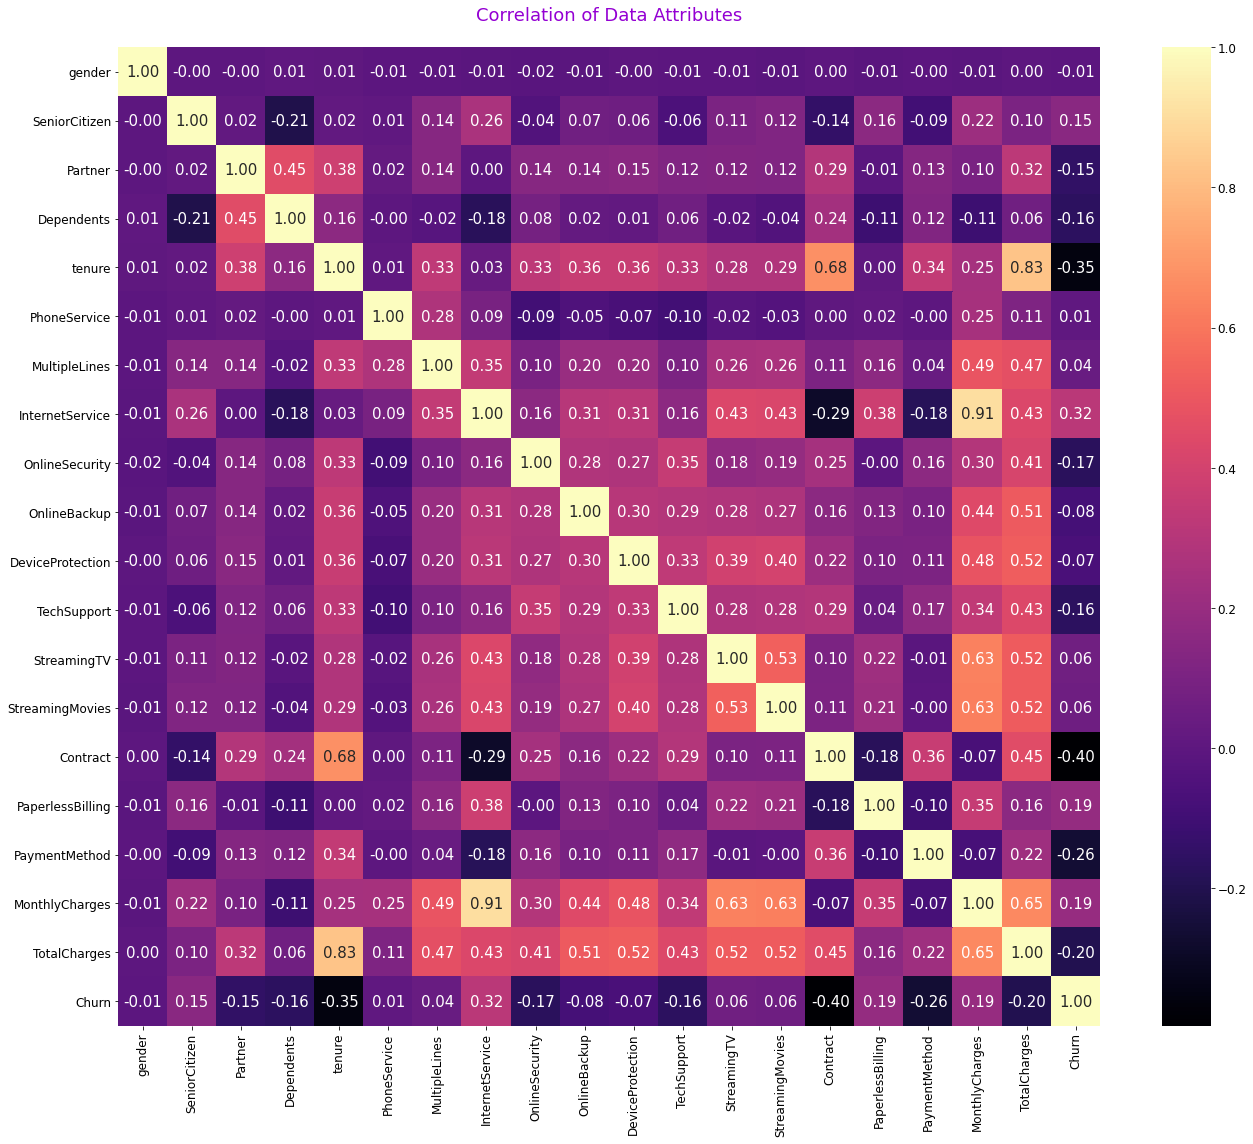

In [19]:
# Checking Correlation by plotting Heatmap for all attributes 
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(22,18))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(teledata.corr(),annot=True,fmt= '.2f',cmap='magma');
plt.show()

***
**Key Observations:-**
* In Attribute "tenure" Mean is alomost equal to Median. Hence we can expect Normal Distributioon of values.
* Minimun MonthlyCharges is 18.25 and Maximum is 118.75.
* Minimum TotalCharges is 18.80 and Maximum is 8684.80.
* By observing skewness table we found attributes "SeniorCitizen", "PhoneService", "Churn" are highly skewed.
* Variance table is showing low variance of data.
* Correlation heatmap showing positive correlation among most of attributes.
* "gender" attribute is negatively correlated with most of attributes.
***

## Analysis of Loyalty of Customers.

* Here we consider tenure and churn attributes to analyze loyalty of customer.

### * Percentage of Loyal Customers

In [20]:
# Getting Percentage of Loyal Customer
print('\033[1mPercentage of Loyal Customer =',round(teledata[teledata['Churn']==0].shape[0]/teledata.shape[0]*100,2),'%')

Percentage of Loyal Customer = 73.42 %



### * Highest Tenure of Loyal Customer.

In [21]:
# Getting Highest Loyality of Customer
print('\033[1mHighest Tenure:-\n  > Loyal Customer        =',teledata[teledata['Churn']==0]['tenure'].max())
print('\033[1m  > Not so Loyal Customer =',teledata[teledata['Churn']==0]['tenure'].max())

Highest Tenure:-
  > Loyal Customer        = 72
  > Not so Loyal Customer = 72



### * Lowest Tenure of Loyal Customer.

In [22]:
# Getting Lowest Loyality of Customer
print('\033[1mLowest Tenure:-\n  > Loyal Customer        =',teledata[teledata['Churn']==0]['tenure'].min())
print('\033[1m  > Not so Loyal Customer =',teledata[teledata['Churn']==0]['tenure'].min())

Lowest Tenure:-
  > Loyal Customer        = 1
  > Not so Loyal Customer = 1



### * Average Tenure of Loyal and Not so Loyal Customer.

In [23]:
# Getting Average Loyality of Customer
print('\033[1mAverage Tenure:-\n  > Loyal Customer        =',round(teledata[teledata['Churn']==0]['tenure'].mean(),2))
print('\033[1m  > Not so Loyal Customer =',round(teledata[teledata['Churn']==1]['tenure'].mean(),2))
print('\033[1m    _____________________   ____')

# Getting Difference in Averages
print('\033[1m    Difference            =',round(round(teledata[teledata['Churn']==0]['tenure'].mean(),2)-
                                      round(teledata[teledata['Churn']==1]['tenure'].mean(),2),2))

Average Tenure:-
  > Loyal Customer        = 37.65
  > Not so Loyal Customer = 17.98
    _____________________   ____
    Difference            = 19.67



### * Visualizing Relation between Tenure and Churn.

Plot Showing Relation between Tenure and Churn:-


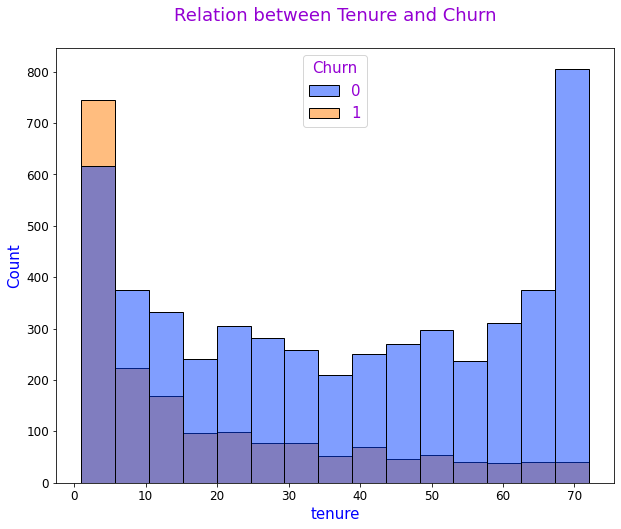

In [24]:
# Visualizing Relation between Tenure and Churn
print(f'\033[1mPlot Showing Relation between Tenure and Churn:-')
plt.figure(figsize=(10,8))
plt.title(f'Relation between Tenure and Churn\n')
sns.histplot(data=teledata, x = 'tenure', hue = 'Churn', palette='bright');
plt.show()

***
**Key Observations:-**
* By analysis we found 73.42% of Loyal customers.
* Highest and Lowest Tenure are equal for both loyal and not so loyal customers.
* There is a difference of 19.67 in average tenures of loyal and not so loyal customers.
***

## Churn of Customers based on Gender.

Here we check gender based interest on churn.

### Analysis of Gender of Customers who do not Churn:-

In [25]:
# Getting Customers who do not churn
G = teledata[teledata['Churn']==0]

print('\033[1mCustomers who do not churn:-\n\n Females =',G[G['gender']==0].shape[0],'\n Males   =',G[G['gender']==1].shape[0])
print('\033[1m _______   ____\n Total   =',G.shape[0])

Customers who do not churn:-

 Females = 2544 
 Males   = 2619
 _______   ____
 Total   = 5163


### Analysis of Gender of Customers who Churn:-

In [26]:
# Getting Customers who churn
G = teledata[teledata['Churn']==1]

print('\033[1mCustomers who churn:-\n\n Females =',G[G['gender']==0].shape[0],'\n Males   =',G[G['gender']==1].shape[0])
print('\033[1m _______   ____\n Total   =',G.shape[0])

Customers who churn:-

 Females = 939 
 Males   = 930
 _______   ____
 Total   = 1869



### * Visualizing Relation between Gender and Churn.

Plot Showing Relation between Gender and Churn:-


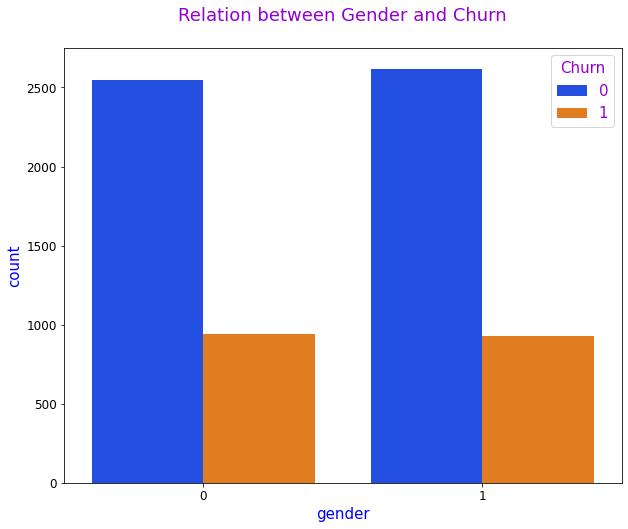

In [27]:
# Visualizing Relation between Gender and Churn
print(f'\033[1mPlot Showing Relation between Gender and Churn:-')
plt.figure(figsize=(10,8))
plt.title(f'Relation between Gender and Churn\n')
sns.countplot(data=teledata, x = 'gender', hue = 'Churn', palette='bright');
plt.show()

***
**Key Observations:-**
* Customers who do not churn, Females = 2544, Males   = 2619
* Customers who churn, Females = 939, Males   = 930
* We can observe that Females are bit more interested to Churn.
***

## Churn of Customers based on Senior Citizen.

### Analysis of Senior Citizen of Customers who do not Churn:-

In [28]:
# Getting Customers who do not churn
G = teledata[teledata['Churn']==0]

print('\033[1mCustomers who do not churn:-\n\n Not Senior Citizen =',G[G['SeniorCitizen']==0].shape[0],
      '\n Senior Citizen     =',G[G['SeniorCitizen']==1].shape[0])
print('\033[1m __________________   ____\n Total              =',G.shape[0])

Customers who do not churn:-

 Not Senior Citizen = 4497 
 Senior Citizen     = 666
 __________________   ____
 Total              = 5163


### Analysis of Senior Citizen of Customers who Churn:-

In [29]:
# Getting Customers who churn
G = teledata[teledata['Churn']==1]

print('\033[1mCustomers who churn:-\n\n Not Senior Citizen =',G[G['SeniorCitizen']==0].shape[0],
      '\n Senior Citizen     =',G[G['SeniorCitizen']==1].shape[0])
print('\033[1m __________________   ____\n Total              =',G.shape[0])

Customers who churn:-

 Not Senior Citizen = 1393 
 Senior Citizen     = 476
 __________________   ____
 Total              = 1869


### Analysis of Churned Senior Citizen of Customers based on Gender:-

In [30]:
G = teledata[teledata['Churn']==1]
G = G[G['SeniorCitizen']==1]

print('\033[1mSenior Citizens who churn:-\n\n Females =',G[G['gender']==0].shape[0],'\n Males   =',G[G['gender']==1].shape[0])
print('\033[1m _______   ____\n Total   =',G.shape[0])

Senior Citizens who churn:-

 Females = 240 
 Males   = 236
 _______   ____
 Total   = 476



### * Visualizing Relation between SeniorCitizen and Churn.

Plot Showing Relation between SeniorCitizen and Churn:-


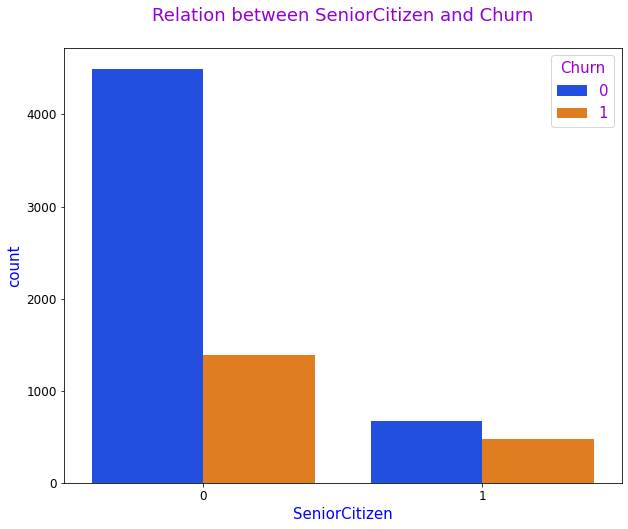

In [31]:
# Visualizing Relation between SeniorCitizen and Churn
print(f'\033[1mPlot Showing Relation between SeniorCitizen and Churn:-')
plt.figure(figsize=(10,8))
plt.title(f'Relation between SeniorCitizen and Churn\n')
sns.countplot(data=teledata, x = 'SeniorCitizen', hue = 'Churn', palette='bright');
plt.show()

***
**Key Observations:-**
* We find very less number of SeniorCitizen who are interested to Churn.
* Here also Female SeniorCitizans showing bit more interest toward churn.
***

### <span style="color:#9400D3"> * Perform a Detailed Univariate, Bivariate and Multivariate Analysis with Appropriate detailed comments after Each Analysis.

### <u> Univariate Analysis</u>
Univariate analysis is the simplest form of analyzing data. It involves only one variable.

#### Creating Functions for Plotting the Quantitative and Categorical Data for Univariate Analysis.

We will use these functions for easy analysis of individual attribute.

In [32]:
# Creating Plot function for Quantitative Attributes

def qt_data(x):   
    
    # Plotting Distribution for Quantitative attribute
    print(f'\033[1mPlot Showing Distribution of Feature "{x}":-')
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of "{x}"\n')
    sns.distplot(teledata[x],color='#9400D3');
    print('')
    plt.show()
    print('\n__________________________________________________________________________________________________\n')
    print('')
    
    # Box plot for Quantitative data
    print(f'\033[1mPlot Showing 5 point summary with outliers of Attribute "{x}":-\n')
    plt.figure(figsize=(12,6))
    plt.title(f'Box Plot for "{x}"\n')
    sns.boxplot(teledata[x],color="#9400D3");
    plt.show()

# Creating Plot function for Categorical Attributes

def cat_data(x):
    
    # Plotting Frequency Distribution of categorical attribute
    colors = ['gold','tomato','yellowgreen','#ADD8E6']
    print(f'\033[1mPlot Showing Frequency Distribution of Attribute "{x}":-')
    plt.figure(figsize=(10,8))
    plt.title(f'Frequencies of "{x}" Attribute\n')
    sns.countplot(teledata[x],palette='bright');
    plt.show()
    print('\n___________________________________________________________________________________')
    print('')
    
    # Plotting Pie Chart to check contribution of categorical attribute
    print(f'\033[1m\nPie Chart Showing Contribution of Each Category of "{x}" feature:-\n')
    plt.title(f'Contribution of Each Category of "{x}" Attribute\n\n\n\n\n\n')
    teledata[x].value_counts().plot.pie(radius=2.5,shadow=True,autopct='%1.1f%%',colors=colors);
    plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
    plt.show()

* Plot Function is Created, Now we will do Univariate Analysis

#### Attribute 1: "gender"

Plot Showing Frequency Distribution of Attribute "gender":-


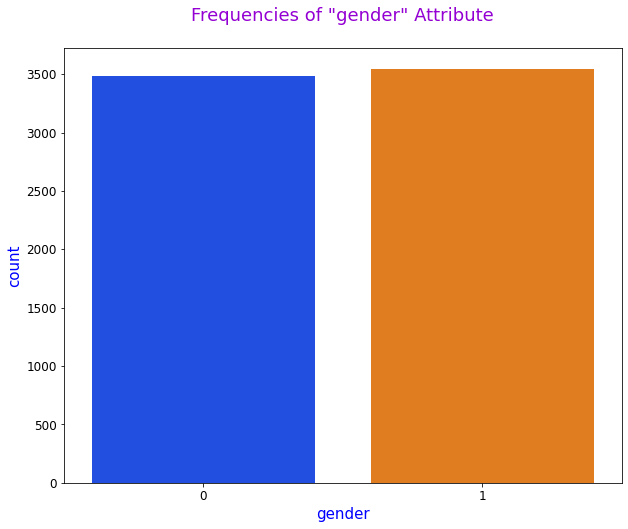


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "gender" feature:-



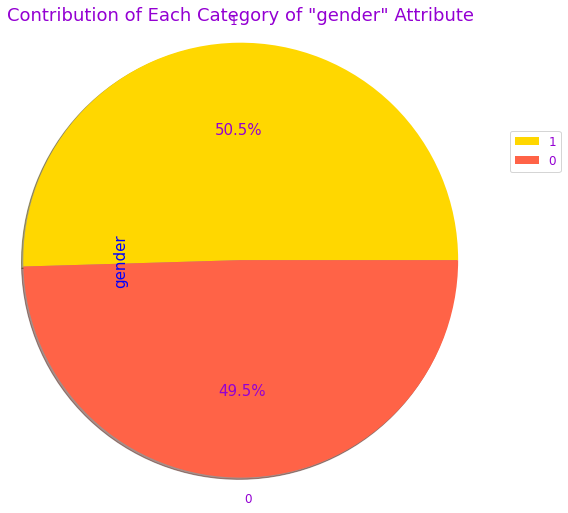

In [33]:
# Univariate analysis fpr Gender Attribute
cat_data('gender')

***
**Key Observations:-**
* Gender attribute is well balanced.
* Both genders are alomost equally distributed.
***

#### Attribute 2: "SeniorCitizen"

Plot Showing Frequency Distribution of Attribute "SeniorCitizen":-


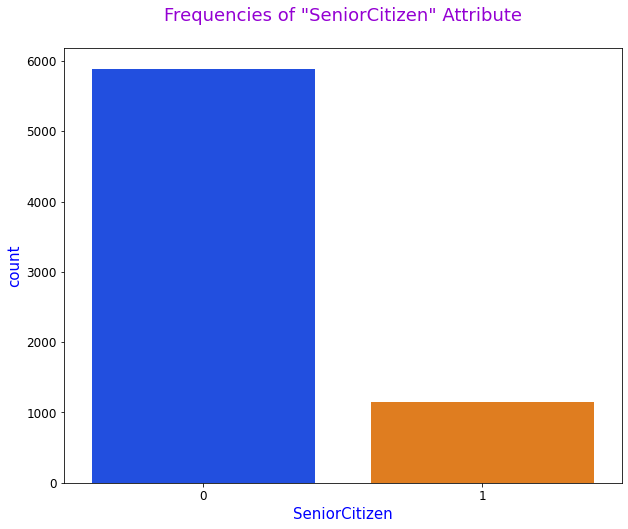


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "SeniorCitizen" feature:-



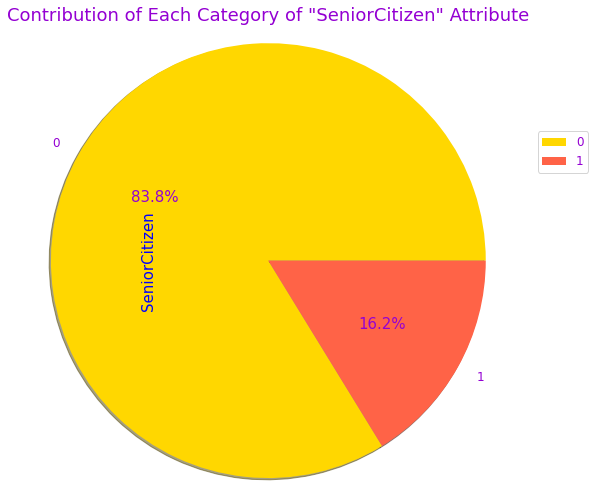

In [34]:
# Univariate analysis fpr SeniorCitizen Attribute
cat_data('SeniorCitizen')

***
**Key Observations:-**
* SeniorCitizen attribute is highly imbalanced.
* By observing above data we can say there is very less SeniorCitizens who are contributing.

***

#### Attribute 3: "Partner"

Plot Showing Frequency Distribution of Attribute "Partner":-


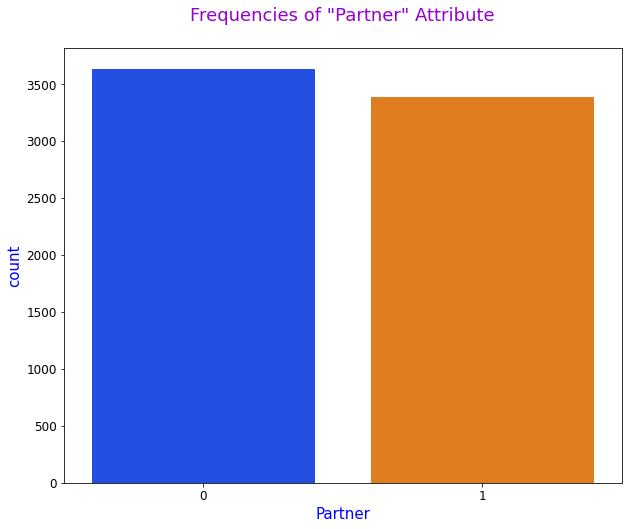


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "Partner" feature:-



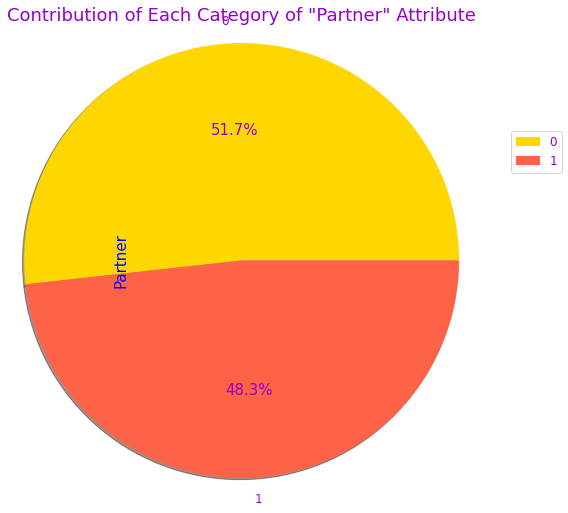

In [35]:
# Univariate analysis fpr Partner Attribute
cat_data('Partner')

***
**Key Observations:-**
* Partner attribute is very well balanced.
* Values are almost equally distributed.

***

#### Attribute 4: "Dependents"

Plot Showing Frequency Distribution of Attribute "Dependents":-


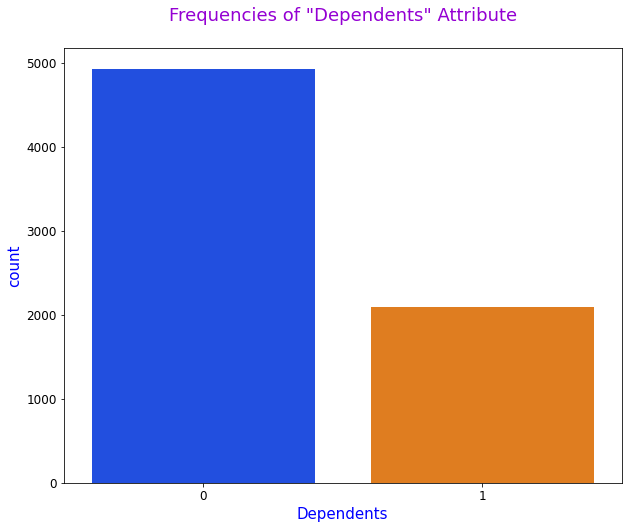


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "Dependents" feature:-



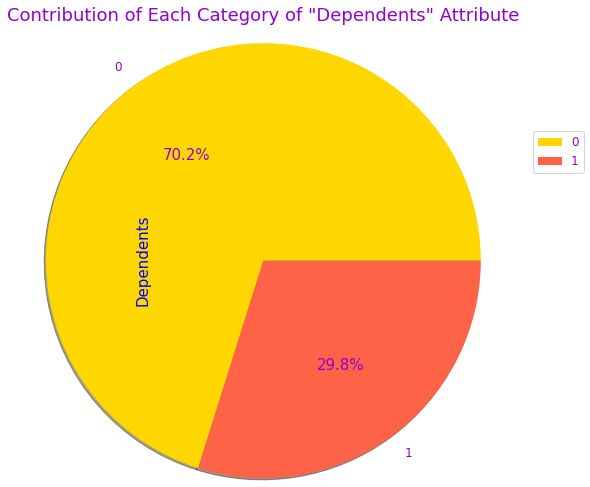

In [36]:
# Univariate analysis fpr Dependents Attribute
cat_data('Dependents')

***
**Key Observations:-**
* There is imbalance in dependents attribute, since contribution of Dependent=0 is high than Dependent=1.

***

#### Attribute 5: "tenure"

Plot Showing Distribution of Feature "tenure":-



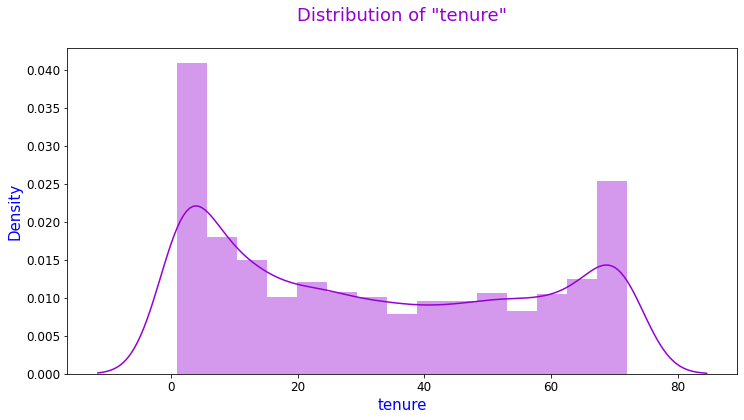


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "tenure":-



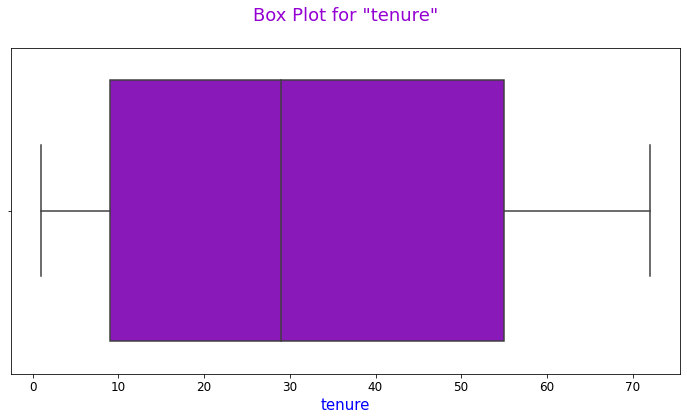

In [37]:
# Univariate analysis fpr Tenure Attribute
qt_data('tenure')

***
**Key Observations:-**
* The distribution of tenure is skewed.
* No Outliers found in this attribute..
* Between 0-40 we can observe high densities.
***

#### Attribute 6: "PhoneService"

Plot Showing Frequency Distribution of Attribute "PhoneService":-


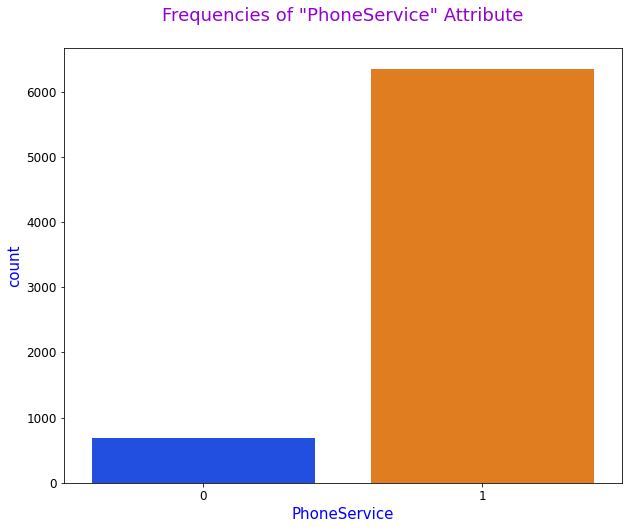


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "PhoneService" feature:-



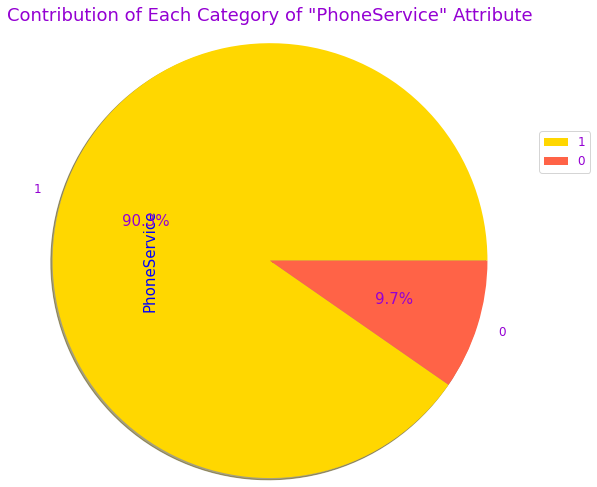

In [38]:
# Univariate analysis fpr PhoneService Attribute
cat_data('PhoneService')

***
**Key Observations:-**
* There is imbalance in PhoneService attribute.
* We can say most of customers are using PhoneService, since PhoneService=1 is covering almost all space.
***

#### Attribute 7: "MultipleLines"

Plot Showing Frequency Distribution of Attribute "MultipleLines":-


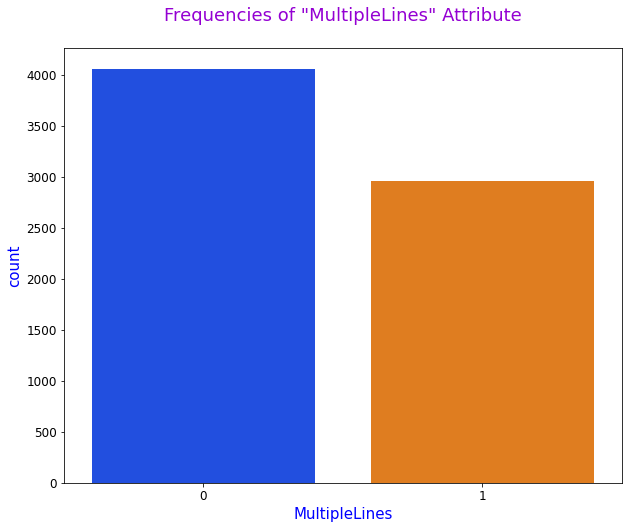


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "MultipleLines" feature:-



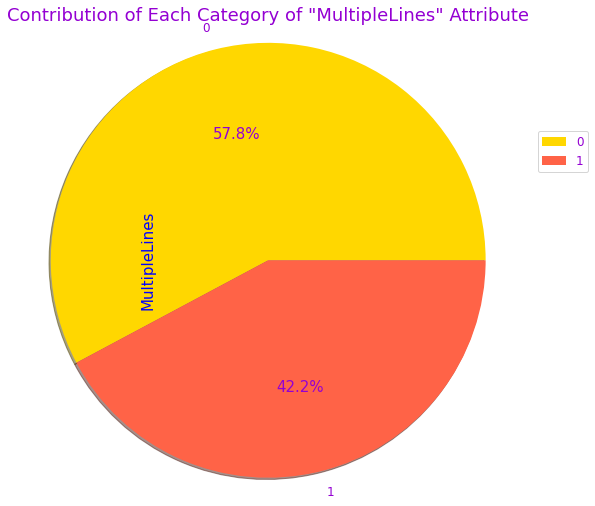

In [39]:
# Univariate analysis fpr MultipleLines Attribute
cat_data('MultipleLines')

***
**Key Observations:-**
* Distribution is quiet balanced.
* About 42.2% of customers are using MultipleLines.
***

#### Attribute 8: "InternetService"

Plot Showing Frequency Distribution of Attribute "InternetService":-


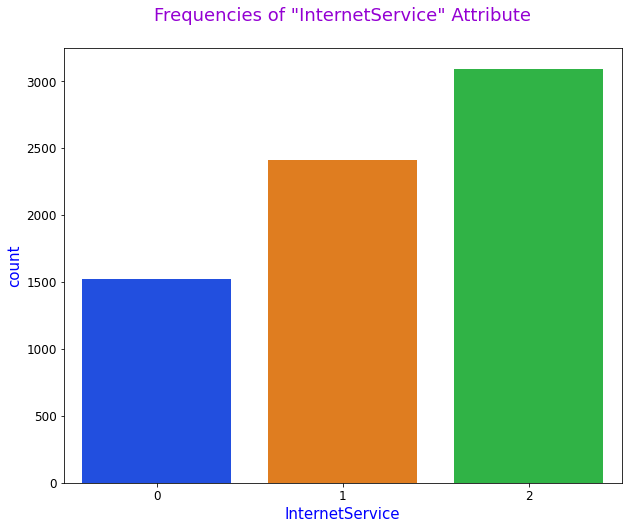


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "InternetService" feature:-



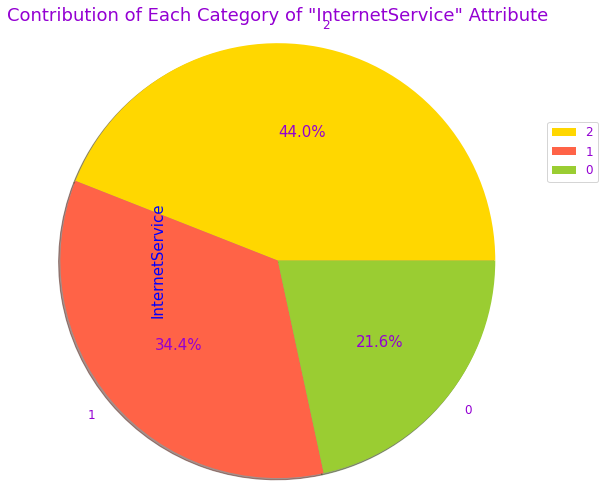

In [40]:
# Univariate analysis fpr InternetService Attribute
cat_data('InternetService')

***
**Key Observations:-**
* InternetService:- No = 0,  DSL = 1,  Fiber optic = 2
* Customers are more interested in using Fiber Optics than DSL.
* Only 21.6% customers are not using Internet Service.
***

#### Attribute 9: "OnlineSecurity"

Plot Showing Frequency Distribution of Attribute "OnlineSecurity":-


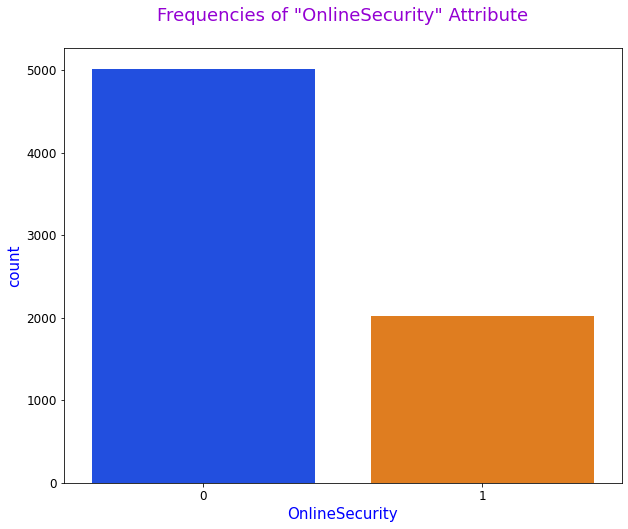


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "OnlineSecurity" feature:-



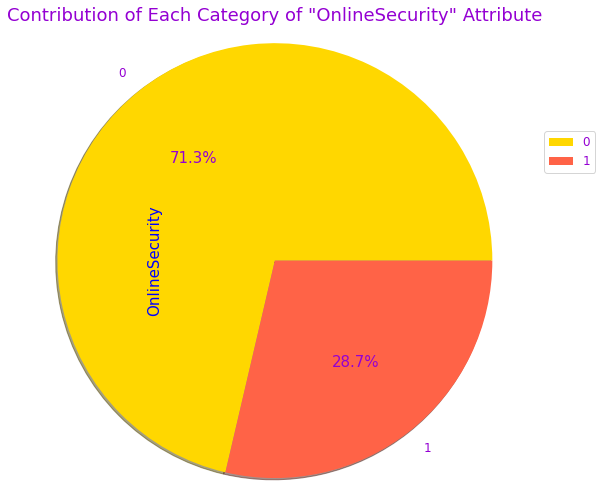

In [41]:
# Univariate analysis fpr OnlineSecurity Attribute
cat_data('OnlineSecurity')

***
**Key Observations:-**
* Very few customers are using online security service,i.e about 28.7%.
***

#### Attribute 10: "OnlineBackup"

Plot Showing Frequency Distribution of Attribute "OnlineBackup":-


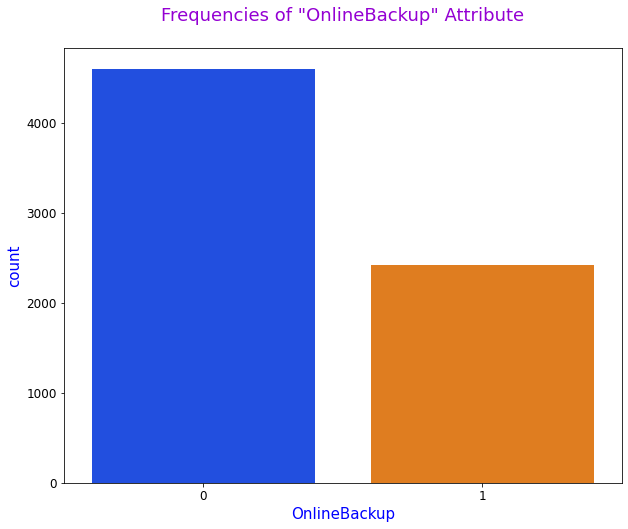


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "OnlineBackup" feature:-



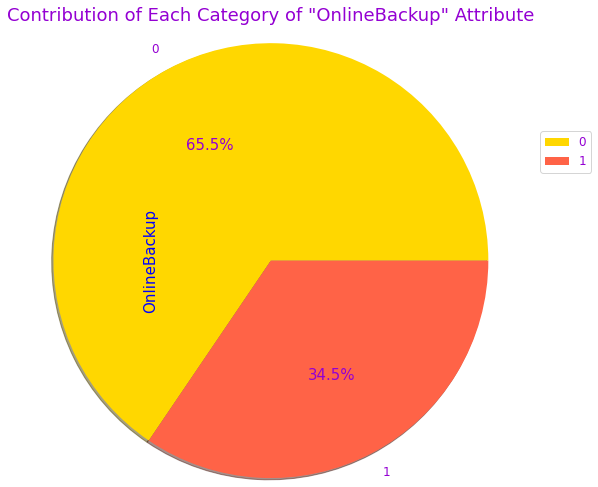

In [42]:
# Univariate analysis fpr OnlineBackup Attribute
cat_data('OnlineBackup')

***
**Key Observations:-**
* Few customers are using online backup service,i.e about 34.5%
***

#### Attribute 11: "DeviceProtection"

Plot Showing Frequency Distribution of Attribute "DeviceProtection":-


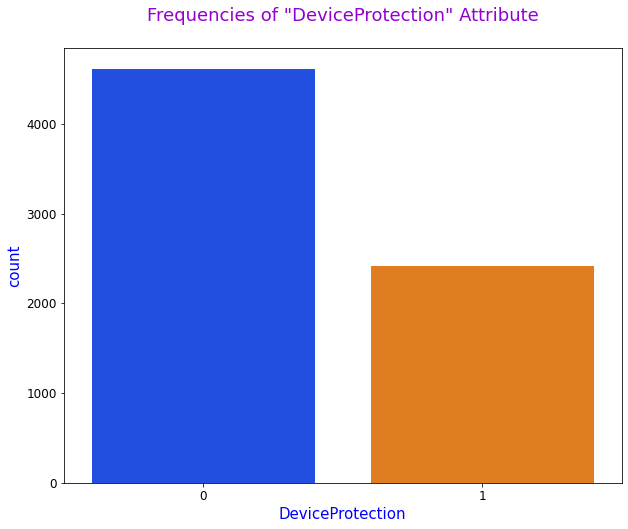


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "DeviceProtection" feature:-



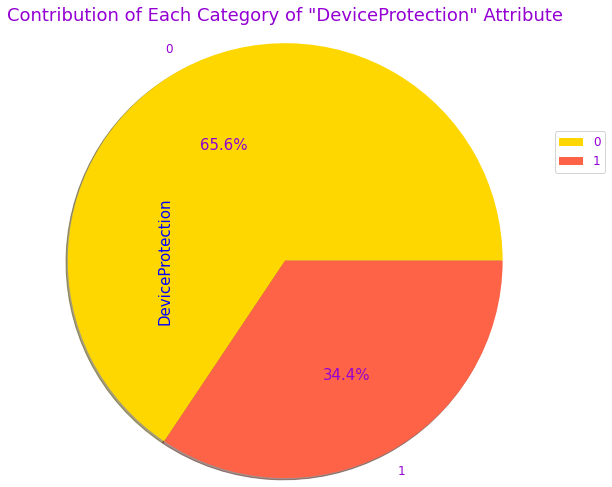

In [43]:
# Univariate analysis fpr DeviceProtection Attribute
cat_data('DeviceProtection')

***
**Key Observations:-**
* Few customers are using DeviceProtection service,i.e about 34.4%
***

#### Attribute 12: "TechSupport"

Plot Showing Frequency Distribution of Attribute "TechSupport":-


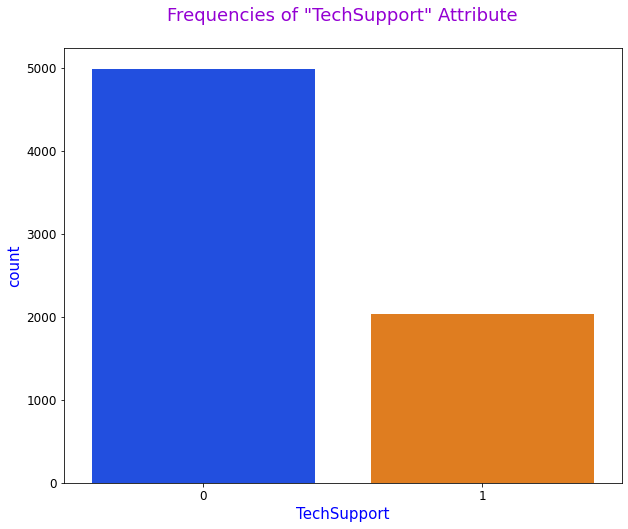


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "TechSupport" feature:-



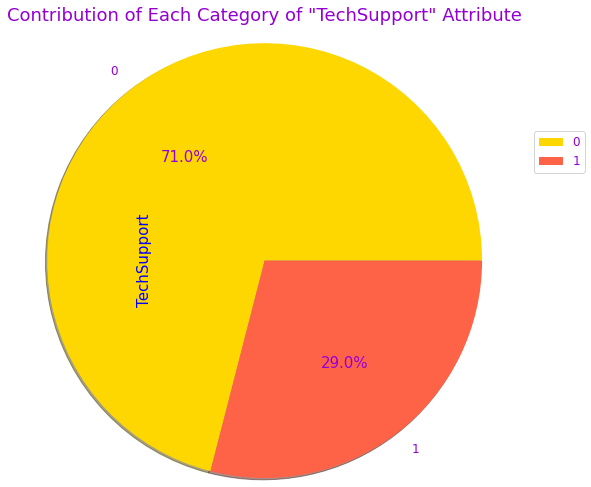

In [44]:
# Univariate analysis fpr TechSupport Attribute
cat_data('TechSupport')

***
**Key Observations:-**
* Few customers make use of TechSupport service,i.e about 29%
***

#### Attribute 13: "StreamingTV"

Plot Showing Frequency Distribution of Attribute "StreamingTV":-


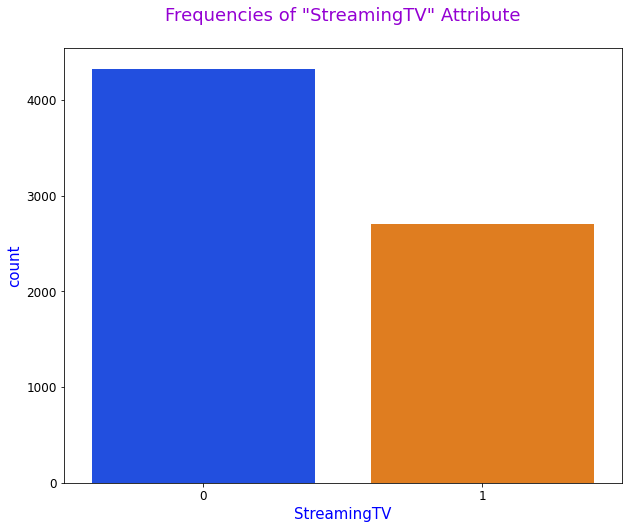


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "StreamingTV" feature:-



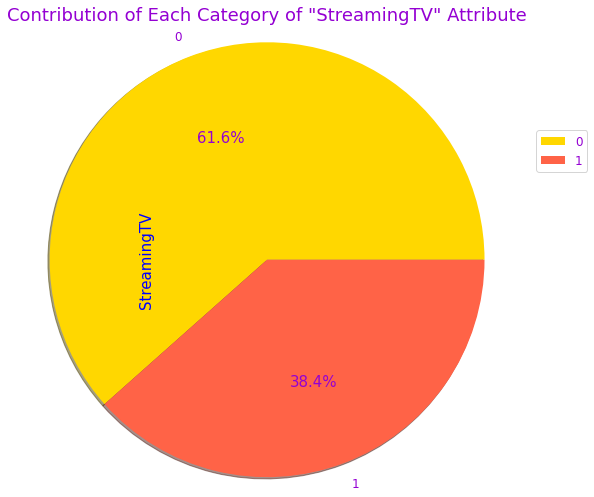

In [45]:
# Univariate analysis fpr StreamingTV Attribute
cat_data('StreamingTV')

***
**Key Observations:-**
* There is imbalance in data.
* Few customers make use of StreamingTV service,i.e about 38.4%.
***

#### Attribute 14: "StreamingMovies"

Plot Showing Frequency Distribution of Attribute "StreamingMovies":-


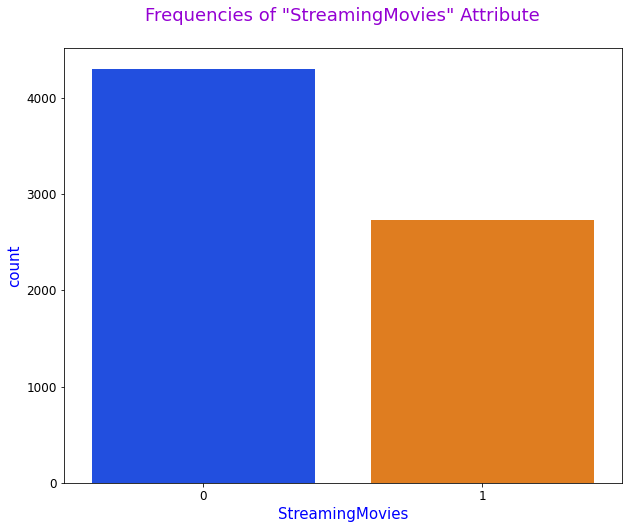


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "StreamingMovies" feature:-



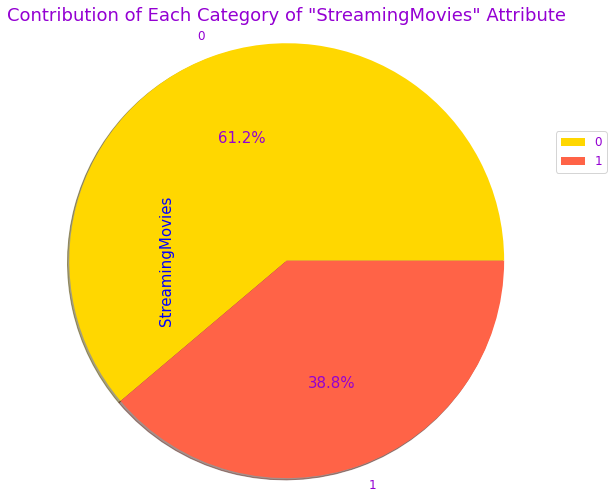

In [46]:
# Univariate analysis fpr StreamingMovies Attribute
cat_data('StreamingMovies')

***
**Key Observations:-**
* Few customers make use of StreamingMovies service,i.e about 38.8%
***

#### Attribute 15: "Contract"

Plot Showing Frequency Distribution of Attribute "Contract":-


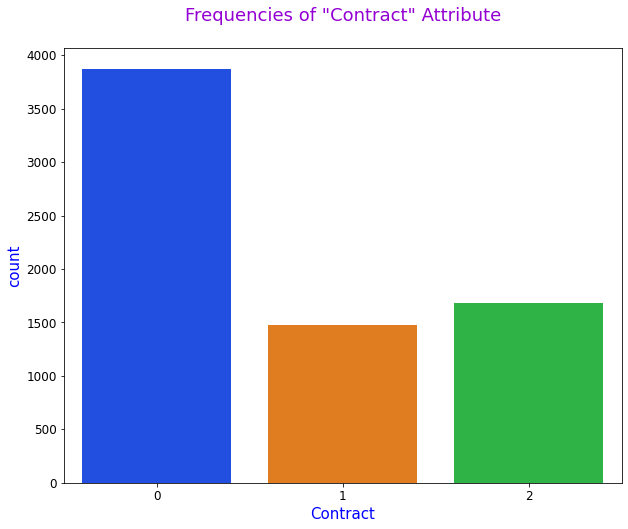


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "Contract" feature:-



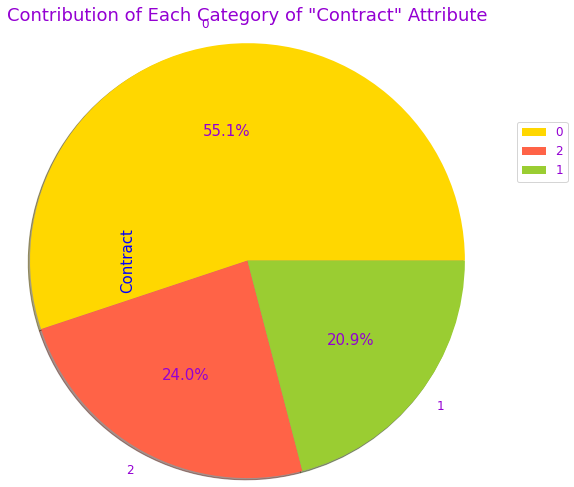

In [47]:
# Univariate analysis fpr Contract Attribute
cat_data('Contract')

***
**Key Observations:-**
* Contract Attribute:- Month-to-month = 0,  One year = 1,  Two year = 2.
* Customers show more interest on month-month contract(about 55.1%).
***

#### Attribute 16: "PaperlessBilling"

Plot Showing Frequency Distribution of Attribute "PaperlessBilling":-


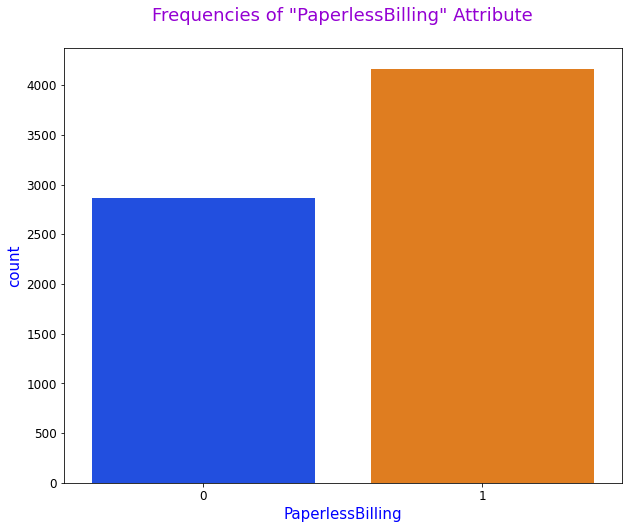


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "PaperlessBilling" feature:-



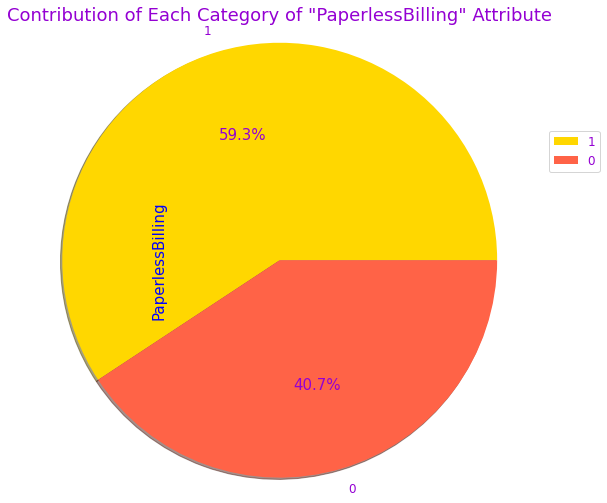

In [48]:
# Univariate analysis fpr PaperlessBilling Attribute
cat_data('PaperlessBilling')

***
**Key Observations:-**
* Data is quiet balanced.
* 59.3% of customers are interested in PaperlessBilling.
***

#### Attribute 17: "PaymentMethod"

Plot Showing Frequency Distribution of Attribute "PaymentMethod":-


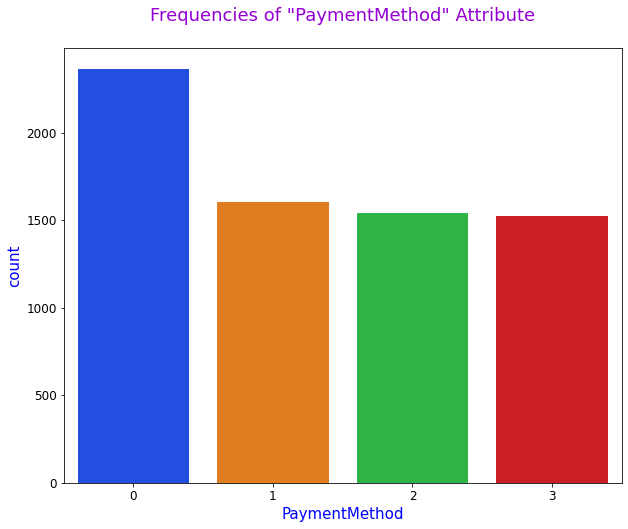


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "PaymentMethod" feature:-



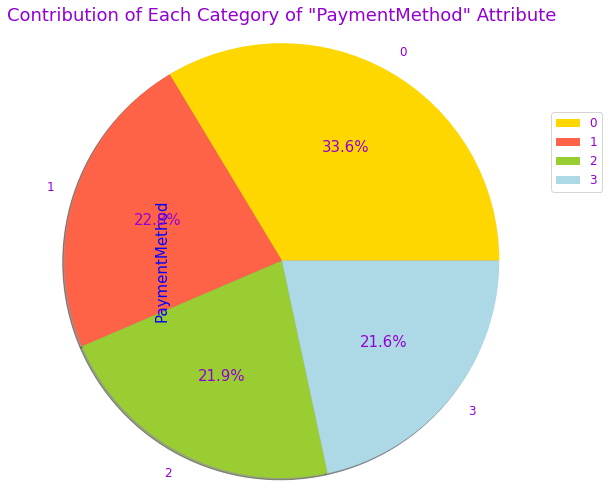

In [49]:
# Univariate analysis fpr PaymentMethod Attribute
cat_data('PaymentMethod')

***
**Key Observations:-**
* PaymentMethod Attribute:- 
 * Electronic check = 0,
 * Mailed check = 1,
 * Bank transfer (automatic) = 2,
 * Credit card (automatic) = 3
 
* Electronic check is highest payment method used by customers.
* Credit card (automatic) is least used by customers.
* Data seems to be quiet balanced.
***

#### Attribute 18: "MonthlyCharges"

Plot Showing Distribution of Feature "MonthlyCharges":-



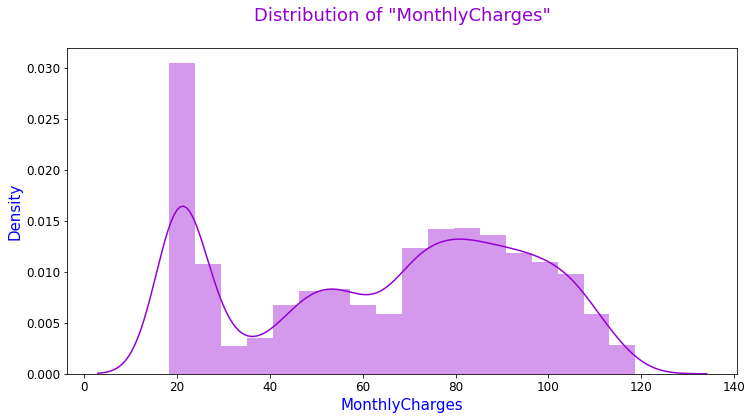


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "MonthlyCharges":-



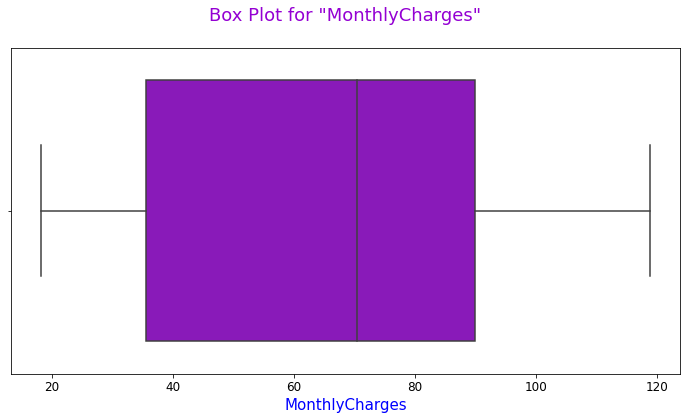

In [50]:
# Univariate analysis fpr MonthlyCharges Attribute
qt_data('MonthlyCharges')

***
**Key Observations:-**
* No Outliers found in box plot.
* Density of MonthlyCharges is high between 70-110.
* Distribution is skewed.
***

#### Attribute 19: "TotalCharges"

Plot Showing Distribution of Feature "TotalCharges":-



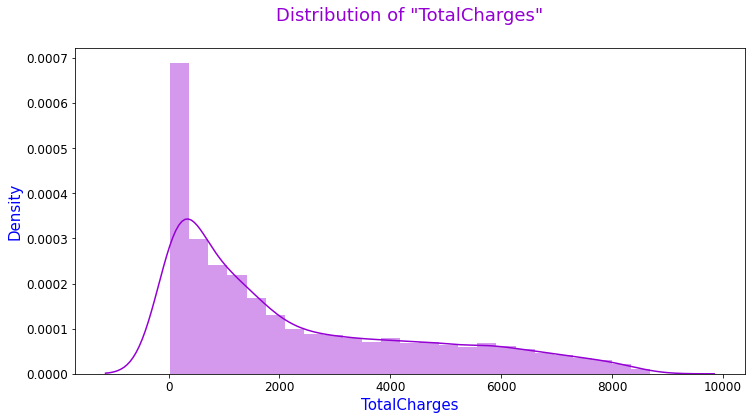


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "TotalCharges":-



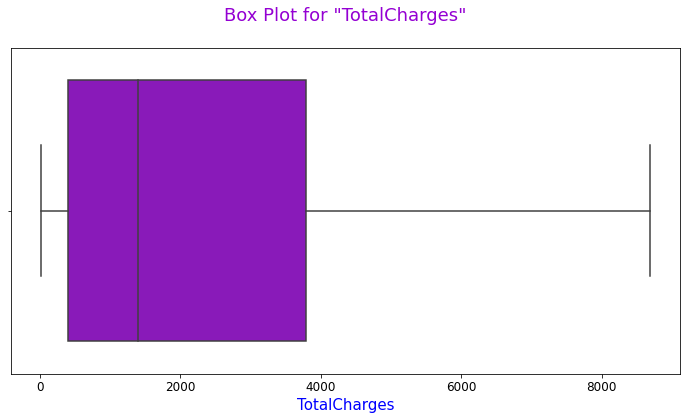

In [51]:
# Univariate analysis fpr TotalCharges Attribute
qt_data('TotalCharges')

***
**Key Observations:-**
* No Outliers found in box plot.
* Density of TotalCharges is high between 0-2000.
* Normal Distribution with Positive skewness.
***

#### Attribute 20: "Churn"

Plot Showing Frequency Distribution of Attribute "Churn":-


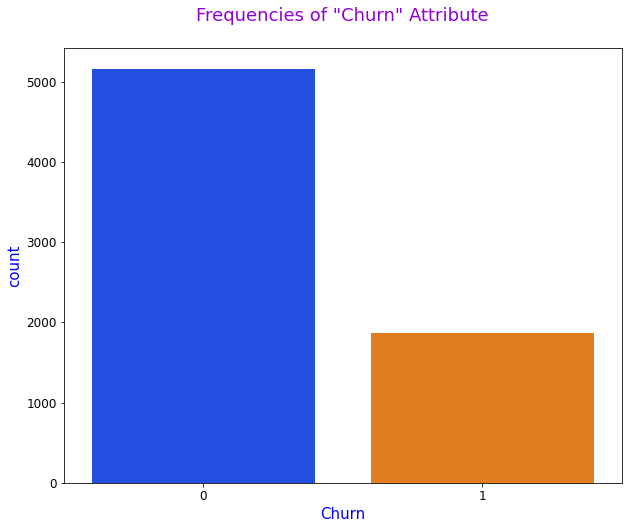


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "Churn" feature:-



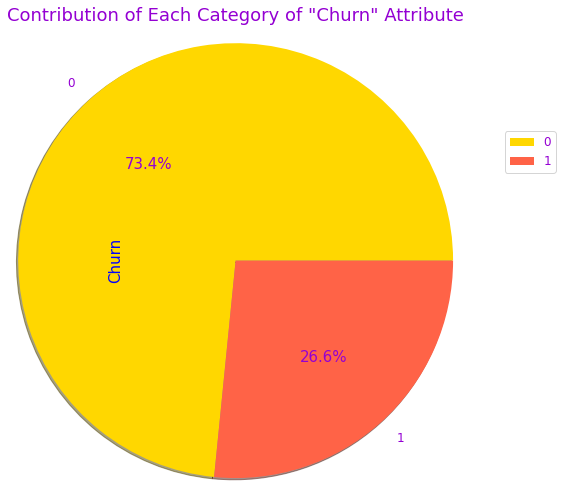

In [52]:
# Univariate analysis fpr Churn Attribute
cat_data('Churn')

***
**Key Observations:-**
* 26.6% of Customers got churned.
* Imbalance in data found.
***

### <u> Bivariate Analysis</u>
    
* Bivariate Analysis is performed to find the relationship between Quantitative Variable and Categorical variable of dataset. 

* To do analysis here we are using Violin plots because Violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region.

* Since we have 17 categorical attributes and 3 discrete attributes, we will use subplots for better representation

#### Creating Functions for Plotting the Quantitative VS Categorical Data for Bivariate Analysis

In [53]:
# Creating Plot function for Quantitative VS Categorical Attributes

def bi_Anly(x):    
    
    # Bivariate Analysis for Quantitative VS All Categorical Attributes
    print(f'\033[1m\nPlots Showing Bivariate Analysis of "{x}" VS All Categorical Attributes:-\n')

    # Setting up Sub-Plots
    fig, axes = plt.subplots(6, 3, figsize=(18, 20))
    fig.suptitle(f'"{x}" VS All Categorical Attributes')
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.6)

    # Plotting Sub-Plots
    sns.violinplot(ax=axes[0, 0], x='gender', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[0, 1], x='SeniorCitizen', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[0, 2], x='Partner', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[1, 0], x='Dependents', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[1, 1], x='PhoneService', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[1, 2], x='MultipleLines', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[2, 0], x='InternetService', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[2, 1], x='OnlineSecurity', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[2, 2], x='OnlineBackup', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[3, 0], x='DeviceProtection', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[3, 1], x='TechSupport', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[3, 2], x='StreamingTV', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[4, 0], x='StreamingMovies', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[4, 1], x='Contract', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[4, 2], x='PaperlessBilling', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[5, 0], x='PaymentMethod', y=x, data=teledata, palette='bright');
    sns.violinplot(ax=axes[5, 1], x='Churn', y=x, data=teledata, palette='bright');

    plt.show()

* Plot Function is Created, Now we will do Bivariate Analysis

**Bivariate Analysis 1: "Tenure" VS All Categorical Attributes**


Plots Showing Bivariate Analysis of "tenure" VS All Categorical Attributes:-



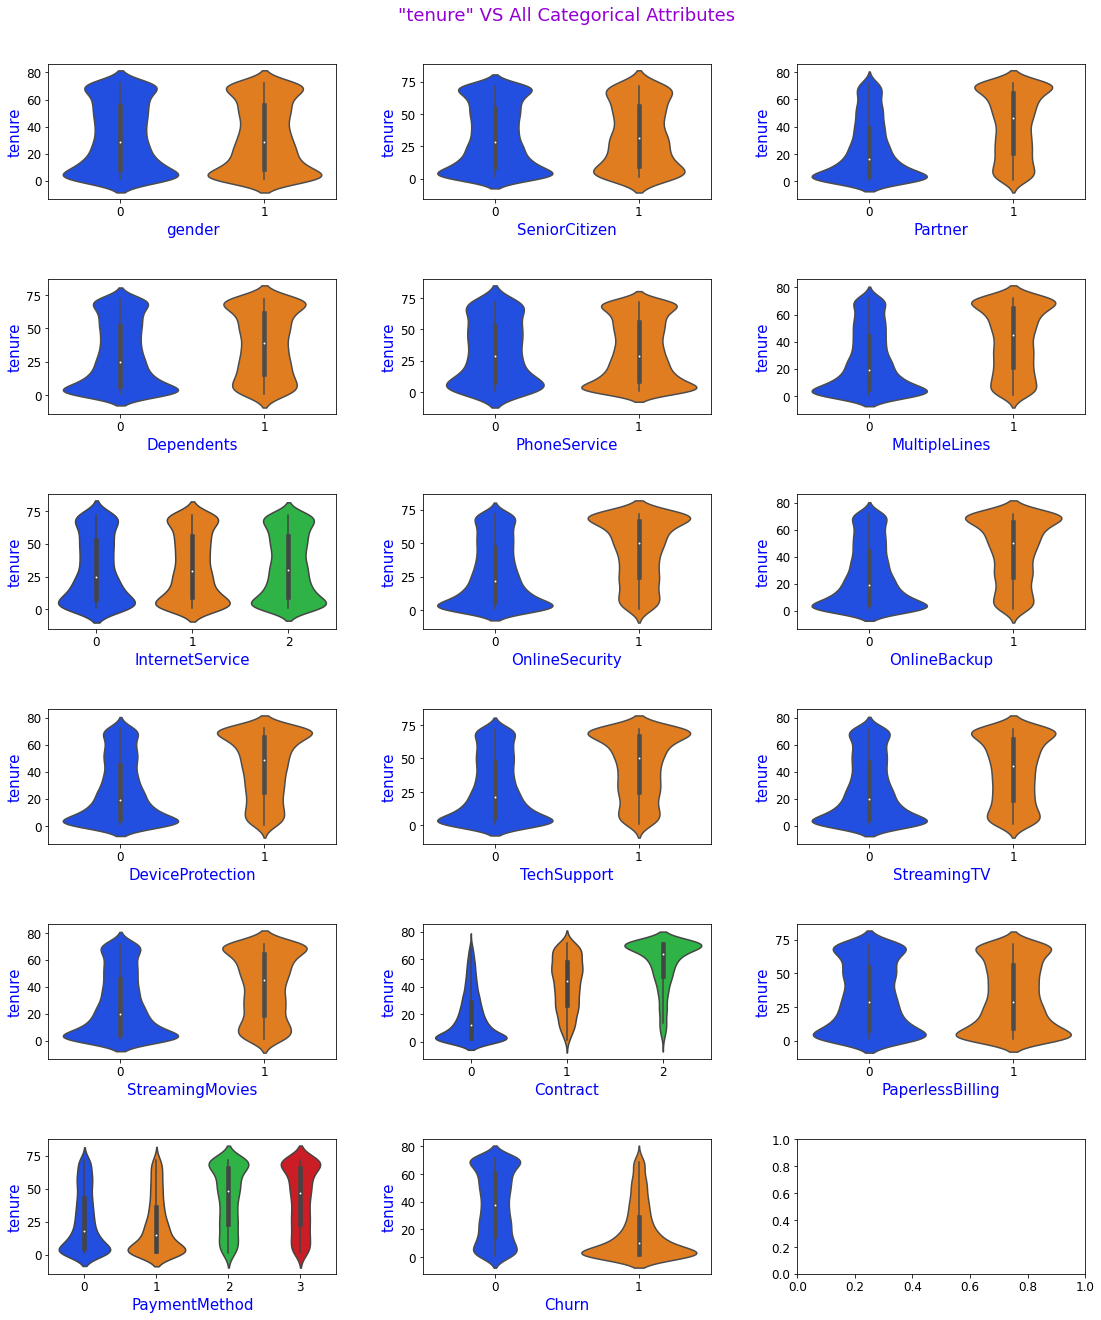

In [54]:
# Bivariate Analysis for "Tenure" VS All Categorical Attributes
bi_Anly('tenure')

***
**Key Observations:-**
* For Attributes gender, SeniorCitizen, PhoneService, InternetService and PaperlessBilling density of every category is high in range 0-20.
* For Attributes Partner, Dependents, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies density is high for category 0  in range 0-20 and for category 1 in range 60-80.
* For attributes Contract and Churn, density is varying for all category.
* In PaymentMethod, category 0 & 1 have high density in range 0-20, and for category 2 & 3 density is high in range 60-80.
***

**Bivariate Analysis 2: "MonthlyCharges" VS All Categorical Attributes**


Plots Showing Bivariate Analysis of "MonthlyCharges" VS All Categorical Attributes:-



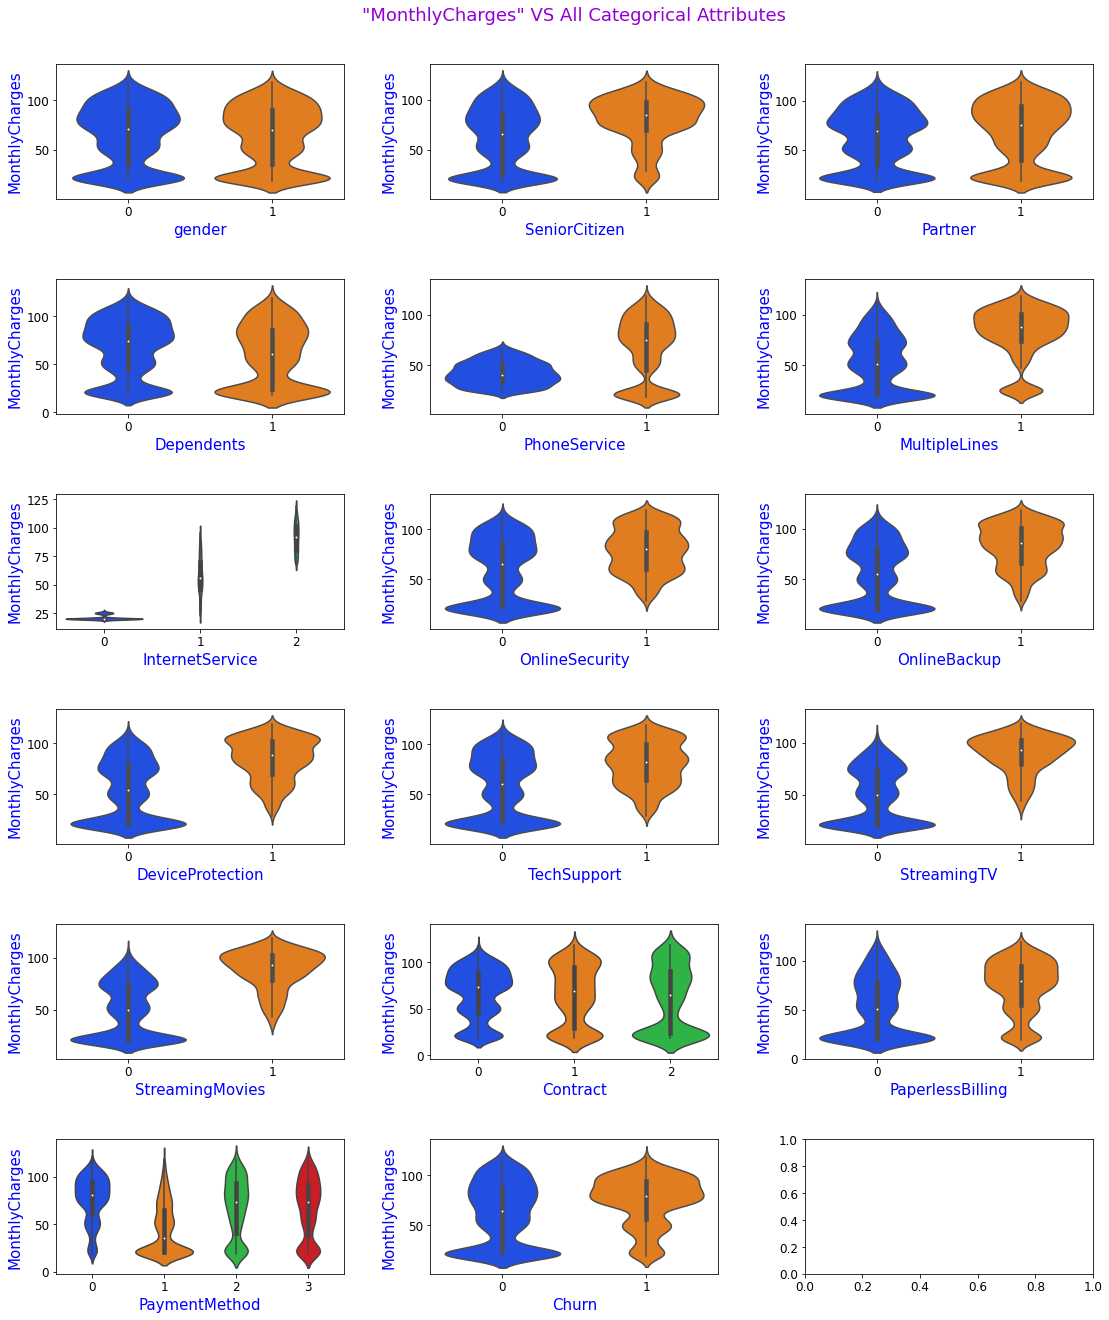

In [55]:
# Bivariate Analysis for "MonthlyCharges" VS All Categorical Attributes
bi_Anly('MonthlyCharges')

***
**Key Observations:-**
* For Attributes gender, SeniorCitizen,Partner, Dependents, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling and Churn density of every category is high in range 50-100.
* For Attribute PhoneService, InternetService and PaymentMethod densities are varying for all categories of attributes.
* We can observe skewness in distribution.
*** 

**Bivariate Analysis 3: "TotalCharges" VS All Categorical Attributes**


Plots Showing Bivariate Analysis of "TotalCharges" VS All Categorical Attributes:-



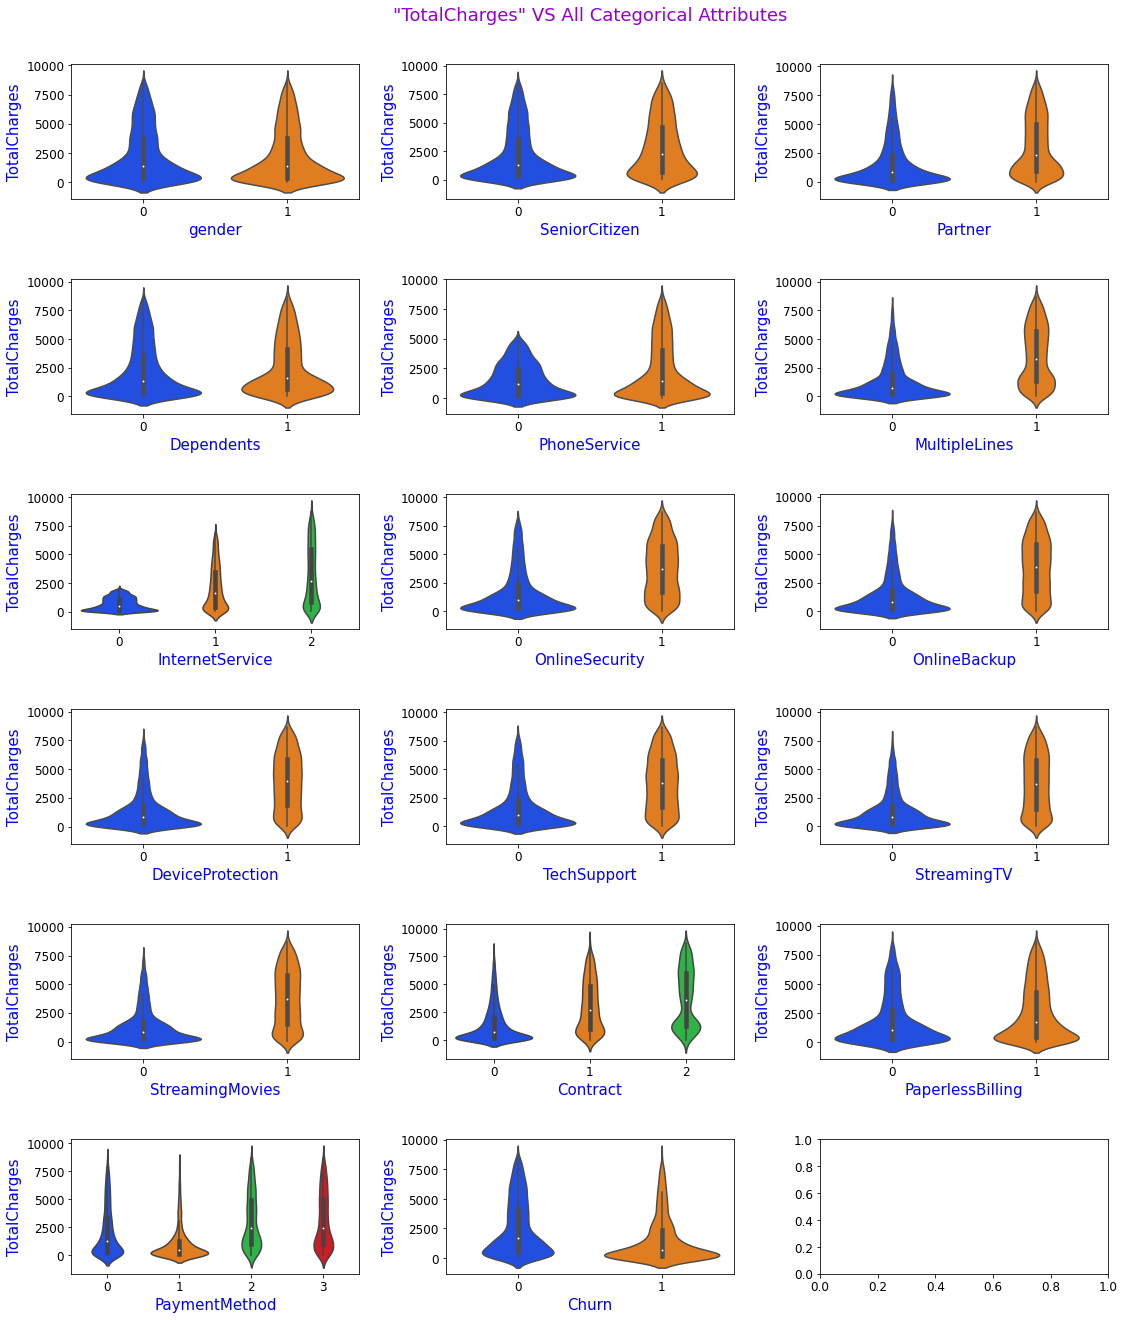

In [56]:
# Bivariate Analysis for "TotalCharges" VS All Categorical Attributes
bi_Anly('TotalCharges')

***
**Key Observations:-**
* For Attributes gender, SeniorCitizen,Partner, PhoneService, Dependents, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling and Churn density of every category is high in range 0-2000.
* For InternetService, Contract, PaymentMethod densities are varying for all categories of attributes.
* Skewness is observed in distribution of data.
*** 

### <u> Multivariate Analysis</u>
    
 Multivariate analysis is performed to understand interactions between different fields in the dataset.
    
#### Multivariate Analysis : To Check Relation Between Quantitative Attributes


Plot Showing Multivariate Analysis to check Relation between Quantitative Attributes:-


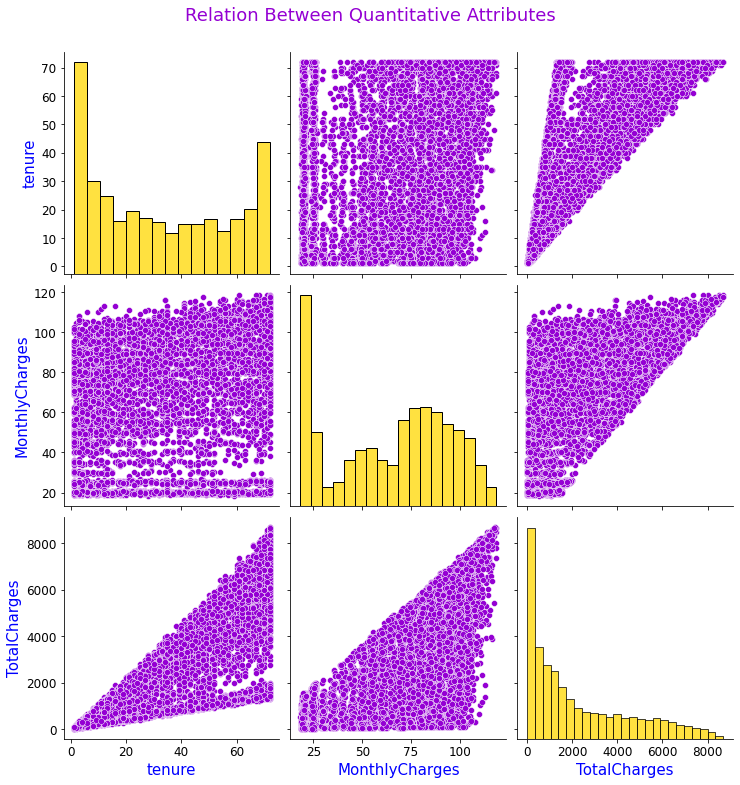

In [57]:
# Multivariate Analysis to Check Relation Between Quantitative Attributes
print('\033[1m\nPlot Showing Multivariate Analysis to check Relation between Quantitative Attributes:-')

# Getting Quantitative Attributes and creating dataframe of it
dis_att = teledata[['tenure','MonthlyCharges','TotalCharges']]

# Plotting pairplot for Quantitative Attributes
sns.pairplot(dis_att, plot_kws={'color':'#9400D3'}, diag_kws={'color':'Gold'}, size=3.5).fig.suptitle(
    'Relation Between Quantitative Attributes', y=1.04);
plt.show()

***
**Key Observations:-**
* We can observe quiet positive correlation between tenure and TotalCharges.
* Monthly charges showing least relation with all other attributes.
*** 

#### Multivariate Analysis : To check Density of Target Attribute in all other Quantitative Features

Plot Showing Multivariate Analysis to check Density of Target Attribute in Quantitative Attributes:-


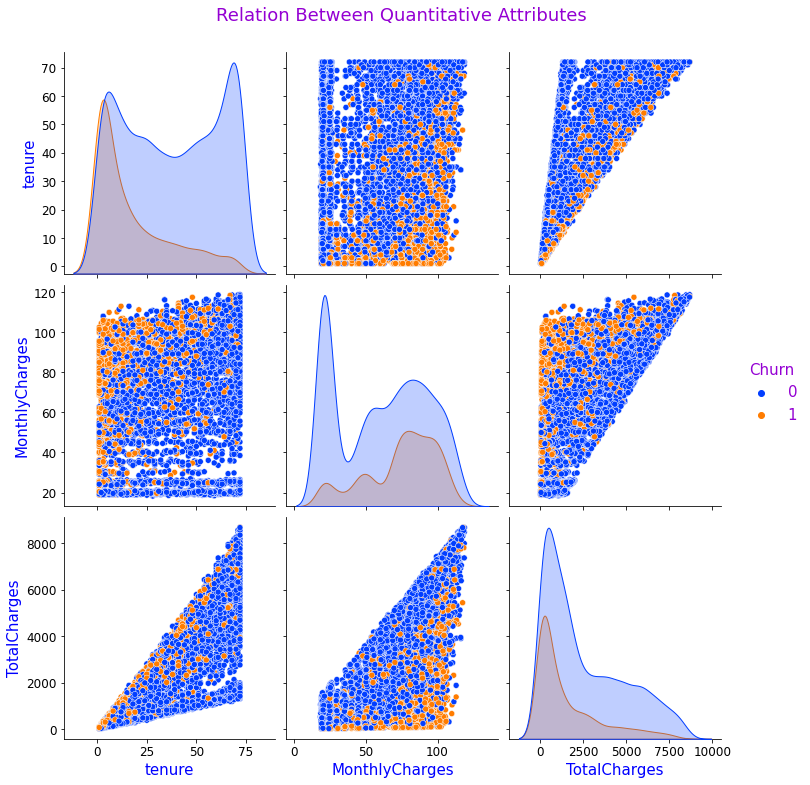

In [58]:
# Multivariate Analysis to check density of Target Attribute in Quantitative Attributes
print('\033[1mPlot Showing Multivariate Analysis to check Density of Target Attribute in Quantitative Attributes:-')

# Adding Target column in dis_att dataframe
dis_att['Churn'] = teledata['Churn']

# Plotting pairplot for Quantitative Attributes
sns.pairplot(dis_att, hue='Churn', palette='bright', size=3.5).fig.suptitle('Relation Between Quantitative Attributes', y=1.04);
plt.show()

***
**Key Observations:-**
* By observing above plots its clear that Churn 0 is dominating.
* We can see traces of Churn 1 here.
***

#### Multivariate Analysis : To Check Correlation

Heatmap showing Correlation of Data attributes:-


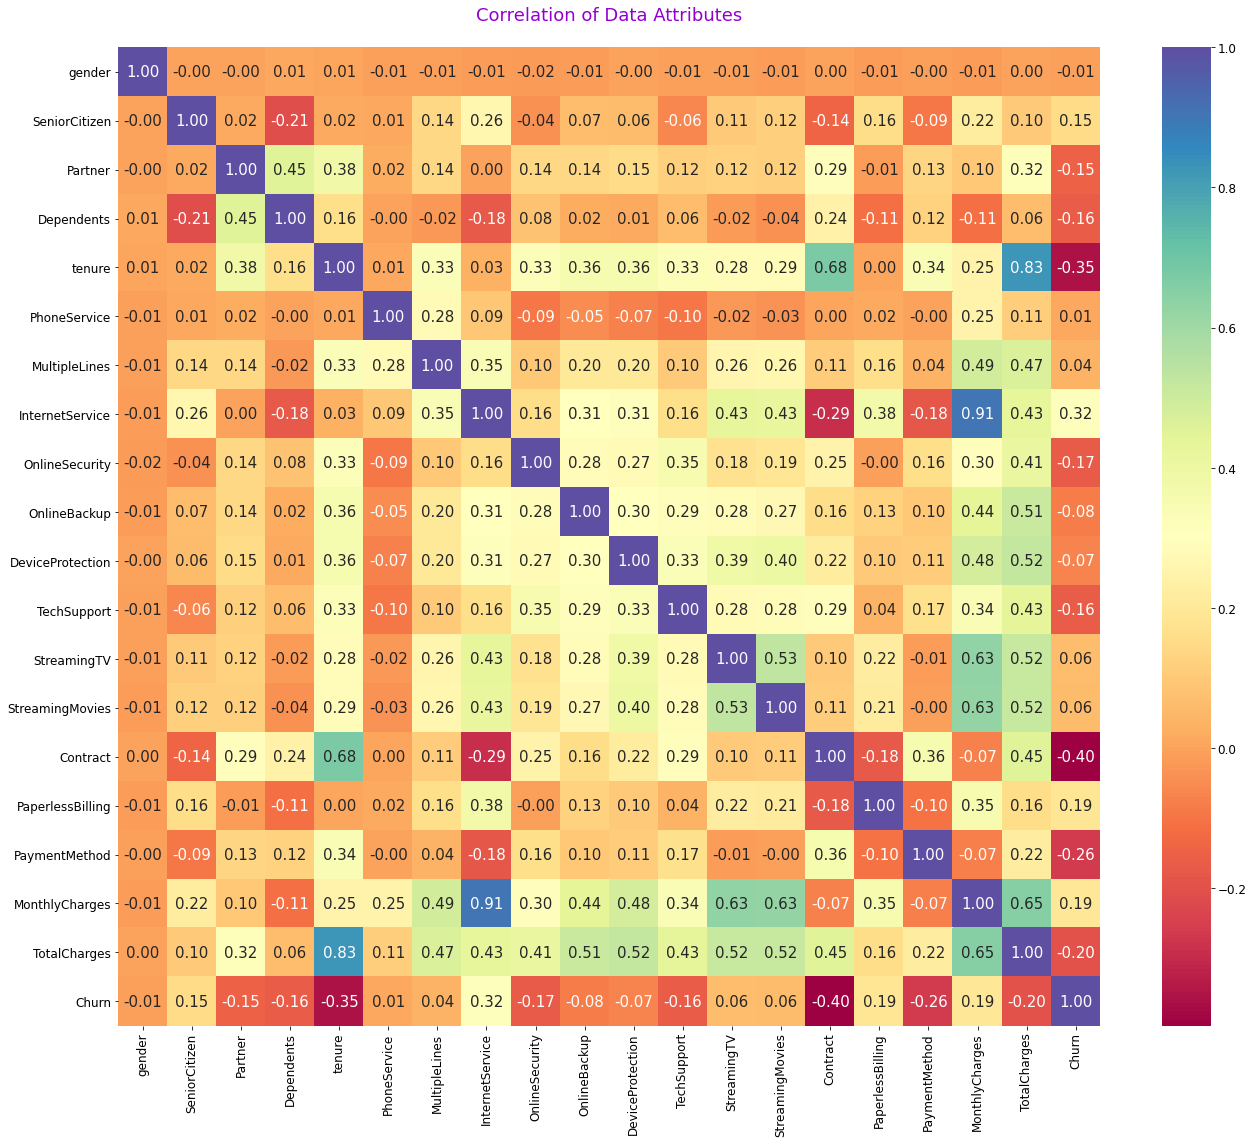

In [59]:
# Plotting Heatmap for checking Correlation
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(22,18))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(teledata.corr(),annot=True,fmt= '.2f',cmap='Spectral');
plt.show()

***
**Key Observations:-**
* Correlation heatmap showing positive correlation among most of attributes.
* "gender" attribute is negatively correlated with most of attributes.
***

## <span style="color:#9400D3">4. Data Pre-Processing:

### Outlier Analysis

Here we will check for outliers in Quantitative data.

In [60]:
# Creating Required Columns
clm = ['tenure','MonthlyCharges','TotalCharges']
AT = []
OL = []

for i in clm:
    AT.append(i)
        
    # Getting Interquartile Range
    q1 = teledata[i].quantile(0.25)
    q3 = teledata[i].quantile(0.75)
    IQR = q3 - q1
        
    # Getting Outliers
    ol = []
    for k in teledata[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            ol.append(k)
    OL.append(len(ol))
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Outliers':OL,})
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis)  


Table Showing Outlier Analysis:-


Attribute  Outliers
0          tenure         0
1  MonthlyCharges         0
2    TotalCharges         0

***
**Key Observations:-**
* We have No Outliers in Quantitative data.
* Also we had observed no outliers in box plots.
***

### Feature Scaling Normalization

* Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
* We will perform scaling on Quantitative attributes.

In [61]:
# Creating list of Quantitative Feature column
clm = ['tenure','MonthlyCharges','TotalCharges']

# Transformation of Quantitative data
Scale = MinMaxScaler()
teledata[clm] = Scale.fit_transform(teledata[clm])

# Displaying minimum and maximum values of Quantitative attributes
display(pd.DataFrame({'Minimum':teledata[clm].min().values, 'Maximum':teledata[clm].max().values}, index = [clm]))

Minimum  Maximum
tenure              0.0      1.0
MonthlyCharges      0.0      1.0
TotalCharges        0.0      1.0

***
**Key Observations:-**
* Feature Scaling Normalization is successfully done.
* we have 0 as minimum and 1 as maximum values for Quantitative data.
***

### <span style="color:#9400D3"> * Segregate Predictors VS Target Attributes
  By sperating Predictors and Target attributes, we can perform further operations easily.

In [62]:
# Getting Predictors by dropping Class Attribute
X = teledata.drop(columns='Churn')

# Getting Target Attribute
y = teledata['Churn'] 

print('\033[1mTable Showing Segregated Predictors:-')
display(X.head())

Table Showing Segregated Predictors:-


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.000000             0   
1       1              0        0           0  0.464789             1   
2       1              0        0           0  0.014085             1   
3       1              0        0           0  0.619718             0   
4       0              0        0           0  0.014085             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3              0                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              0        0.115423      0.001275  
1                 0              1        0.385075      0.215867  
2                 1              1        0.354229      0.010310  
3                 0              2        0.239303      0.210241  
4                 1              0        0.521891      0.015330

***
**Key Observations:-**
* We have Segregated Predictors and Target Attributes and assigned them to X and y respectively
***

### <span style="color:#9400D3"> * Check for Target Balancing and Fix it if found Imbalanced.
* When observation in one class is higher than the observation in other classes then there exists a class imbalance.
* If imbalance of Target attribute is high, then model would be more bias towards higher observation class.

Table Showing Total Observations in each section of Target attribute:-


Total Observations
0                5163
1                1869



Pie Chart Showing Percentage of Each Category of Target Attribute:-


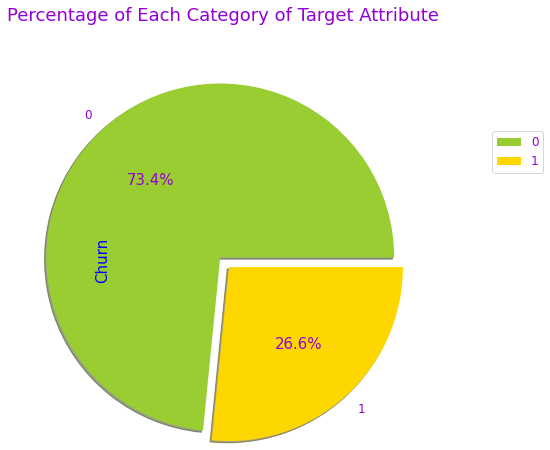

In [63]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations in each section of Target attribute:-')
TAC = y.value_counts().to_frame('Total Observations')
display(TAC)

# Getting Percentages of each category in Target Attribute
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',colors=['yellowgreen','gold']);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Target Attribute found Imbalanced.
* Class 0 is dominating by 73.4% of data.
* Class 1 covers only 26.6% of data.
***

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)

   SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

Table Showing Total Observations in each section of target data for SMOTE:-


__________Total Observations__________                    
                        Before Tranformation After Tranformation
0                                       5163                5163
1                                       1869                5163
Total                                   7032               10326



Pie Chart Showing Percentage of Each Category of Target Attribute:-


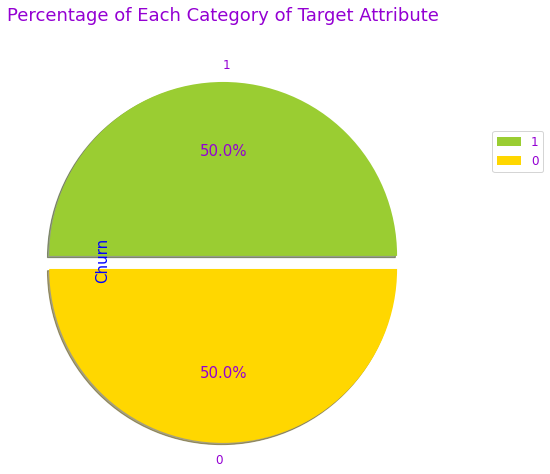

In [64]:
# Getting total observations of target attribute before transformation
yct = y.count()

# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X, y)

# Checking Value Counts of Target Attribute after transforming
print('\033[1mTable Showing Total Observations in each section of target data for SMOTE:-') 
TAC2 = y.value_counts().to_frame('Total Observations')

# For better representation
TVC = pd.DataFrame({'Before Tranformation':TAC['Total Observations'],'After Tranformation':TAC2['Total Observations']})
total  = pd.Series({'Before Tranformation':yct,'After Tranformation':y.count()},name='Total')
TVC = TVC.append(total)
columns=[('__________Total Observations__________', 'Before Tranformation'), ('__________Total Observations__________', 
                                                                              'After Tranformation')]
TVC.columns = pd.MultiIndex.from_tuples(columns)

display(TVC)

# Getting Percentages of each category in Target Attribute

print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',colors=['yellowgreen','gold']);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Target Imbalance has fixed using SMOTE.
* We can observe that 3294 new observation has been added to our data. (10326-7032)
* Now Target variable has equal observations for both sections(0 & 1).
***

### <span style="color:#9400D3"> * Perform Train-Test Split.
 * The procedure involves taking a dataset and dividing it into two subsets.
 * The first subset is used to fit the model and is referred to as the training dataset. 
 * The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
 * Here we keep 75:25 ratio i.e. 75% of data as Training set and 25% as Testing set.

In [65]:
# Splitting into Train and Test Sets in 

# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Train':y_train.value_counts(),'Test':y_test.value_counts(),'Total Observations':y.value_counts()})
total  = pd.Series({'Train':y_train.count(),'Test':y_test.count(),'Total Observations':y.shape[0]},name='Total')
TTS = TTS.append(total)
print('\033[1mTable Showing Train-Test Split of Data:-')
display(TTS)

Table Showing Train-Test Split of Data:-


Train  Test  Total Observations
1       3872  1291                5163
0       3872  1291                5163
Total   7744  2582               10326

***
**Key Observations:-**
* We have Splitted data in 75:25 Ratio.
* Training data has 7744 and Testing data has 2582 observations.
***

### <span style="color:#9400D3"> * Check if the Train and Test data have similar Statistical Characteristics when compared with Original data.
    
* For Statistical Characteristics Comparison we will consider Counts, Mean, Skewness and Standard deviation as our parameter.
* Here we compare characteristics of every attribute with Original and Train and Test Data.

### Comparison of Train data with Original data

In [66]:
# Getting Statistical informations

skw1 = X.skew().to_frame('Skewness')
skw2 = X_train.skew().to_frame('Skewness')
X1 = pd.concat([X.describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([X_train.describe()[0:3].T,skw2],axis=1)
Xdata = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_train.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)
skw3 = pd.DataFrame({}, index=['Skewness'], columns=['Churn','Churn'])
skw3.iloc[:,:1] = y.skew()
skw3.iloc[:,1:] = y_train.skew()
ydata = ydata.append(skw3)

# Displaying Statistical Characteristics Comparison of Train data with Original data
columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_train Data______________', 'count'),('______________X_train Data______________', 'mean'),
          ('______________X_train Data______________', 'std'),('______________X_train Data______________', 'Skewness')]
Xdata.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Churn'),('y_train Data', 'Churn')]
ydata.columns = pd.MultiIndex.from_tuples(columns2)

print('\033[1m\nTable showing Statistical Characteristics for Predictors Attributes:-')
display(Xdata)
print('_____________________________________________________________________________________\n')
print('\033[1m\nTable showing Statistical Characteristics for Target Attributes:-')
display(ydata)


Table showing Statistical Characteristics for Predictors Attributes:-


______________Original Data______________            \
                                                     count      mean   
gender                                             10326.0  0.484796   
SeniorCitizen                                      10326.0  0.172284   
Partner                                            10326.0  0.420492   
Dependents                                         10326.0  0.241526   
tenure                                             10326.0  0.370848   
PhoneService                                       10326.0  0.904029   
MultipleLines                                      10326.0  0.418071   
InternetService                                    10326.0  1.345148   
OnlineSecurity                                     10326.0  0.222545   
OnlineBackup                                       10326.0  0.301763   
DeviceProtection                                   10326.0  0.309123   
TechSupport                                        10326.0  0.230777   
StreamingTV                                        10326.0  0.386694   
StreamingMovies                                    10326.0  0.390761   
Contract                                           10326.0  0.498257   
PaperlessBilling                                   10326.0  0.629963   
PaymentMethod                                      10326.0  1.132675   
MonthlyCharges                                     10326.0  0.490602   
TotalCharges                                       10326.0  0.229490   

                                     ______________X_train Data______________  \
                       std  Skewness                                    count   
gender            0.499793  0.060854                                   7744.0   
SeniorCitizen     0.377645  1.735916                                   7744.0   
Partner           0.493662  0.322178                                   7744.0   
Dependents        0.428029  1.207973                                   7744.0   
tenure            0.335089  0.541820                                   7744.0   
PhoneService      0.294566 -2.743743                                   7744.0   
MultipleLines     0.493266  0.332255                                   7744.0   
InternetService   0.749876 -0.659854                                   7744.0   
OnlineSecurity    0.415975  1.334256                                   7744.0   
OnlineBackup      0.459045  0.863862                                   7744.0   
DeviceProtection  0.462154  0.826193                                   7744.0   
TechSupport       0.421350  1.278155                                   7744.0   
StreamingTV       0.487016  0.465398                                   7744.0   
StreamingMovies   0.487945  0.447838                                   7744.0   
Contract          0.765065  1.129221                                   7744.0   
PaperlessBilling  0.482838 -0.538435                                   7744.0   
PaymentMethod     1.145250  0.450770                                   7744.0   
MonthlyCharges    0.286713 -0.375175                                   7744.0   
TotalCharges      0.249152  1.154400                                   7744.0   

                                                
                      mean       std  Skewness  
gender            0.486699  0.499855  0.053232  
SeniorCitizen     0.176395  0.381180  1.698352  
Partner           0.427040  0.494680  0.295053  
Dependents        0.243156  0.429016  1.197672  
tenure            0.372447  0.333646  0.529658  
PhoneService      0.902247  0.297000 -2.709436  
MultipleLines     0.418518  0.493348  0.330410  
InternetService   1.346462  0.748449 -0.661630  
OnlineSecurity    0.223915  0.416893  1.324830  
OnlineBackup      0.307464  0.461473  0.834657  
DeviceProtection  0.310434  0.462701  0.819601  
TechSupport       0.231405  0.421758  1.274022  
StreamingTV       0.384168  0.486429  0.476376  
StreamingMovies   0.395145  0.488913  0.429043  
Contract          

_____________________________________________________________________________________


Table showing Statistical Characteristics for Target Attributes:-


Original Data y_train Data
                 Churn        Churn
count            10326         7744
mean               0.5          0.5
std           0.500024     0.500032
Skewness             0            0

***
**Key Observations:-**
* By observing above comparision we can say that statistical characteristics of Train and Original data are almost equal
***

### Comparision of Test data with Original data

In [67]:
# Getting Statistical informations

skw1 = X.skew().to_frame('Skewness')
skw2 = X_test.skew().to_frame('Skewness')
X1 = pd.concat([X.describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([X_test.describe()[0:3].T,skw2],axis=1)
Xdata2 = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_test.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)
skw4 = pd.DataFrame({}, index=['Skewness'], columns=['Churn','Churn'])
skw4.iloc[:,:1] = y.skew()
skw4.iloc[:,1:] = y_test.skew()
ydata2 = ydata.append(skw3)

# Displaying Statistical Characteristics Comparison of Test data with Original data
columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_test Data______________', 'count'),('______________X_test Data______________', 'mean'),
          ('______________X_test Data______________', 'std'),('______________X_test Data______________', 'Skewness')]
Xdata2.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Churn'),('y_test Data', 'Churn')]
ydata2.columns = pd.MultiIndex.from_tuples(columns2)

print('\033[1m\nTable showing Statistical Characteristics for Predictors Attributes:-')
display(Xdata2)
print('_____________________________________________________________________________________\n')
print('\033[1m\nTable showing Statistical Characteristics for Target Attributes:-')
display(ydata2)


Table showing Statistical Characteristics for Predictors Attributes:-


______________Original Data______________            \
                                                     count      mean   
gender                                             10326.0  0.484796   
SeniorCitizen                                      10326.0  0.172284   
Partner                                            10326.0  0.420492   
Dependents                                         10326.0  0.241526   
tenure                                             10326.0  0.370848   
PhoneService                                       10326.0  0.904029   
MultipleLines                                      10326.0  0.418071   
InternetService                                    10326.0  1.345148   
OnlineSecurity                                     10326.0  0.222545   
OnlineBackup                                       10326.0  0.301763   
DeviceProtection                                   10326.0  0.309123   
TechSupport                                        10326.0  0.230777   
StreamingTV                                        10326.0  0.386694   
StreamingMovies                                    10326.0  0.390761   
Contract                                           10326.0  0.498257   
PaperlessBilling                                   10326.0  0.629963   
PaymentMethod                                      10326.0  1.132675   
MonthlyCharges                                     10326.0  0.490602   
TotalCharges                                       10326.0  0.229490   

                                     ______________X_test Data______________  \
                       std  Skewness                                   count   
gender            0.499793  0.060854                                  2582.0   
SeniorCitizen     0.377645  1.735916                                  2582.0   
Partner           0.493662  0.322178                                  2582.0   
Dependents        0.428029  1.207973                                  2582.0   
tenure            0.335089  0.541820                                  2582.0   
PhoneService      0.294566 -2.743743                                  2582.0   
MultipleLines     0.493266  0.332255                                  2582.0   
InternetService   0.749876 -0.659854                                  2582.0   
OnlineSecurity    0.415975  1.334256                                  2582.0   
OnlineBackup      0.459045  0.863862                                  2582.0   
DeviceProtection  0.462154  0.826193                                  2582.0   
TechSupport       0.421350  1.278155                                  2582.0   
StreamingTV       0.487016  0.465398                                  2582.0   
StreamingMovies   0.487945  0.447838                                  2582.0   
Contract          0.765065  1.129221                                  2582.0   
PaperlessBilling  0.482838 -0.538435                                  2582.0   
PaymentMethod     1.145250  0.450770                                  2582.0   
MonthlyCharges    0.286713 -0.375175                                  2582.0   
TotalCharges      0.249152  1.154400                                  2582.0   

                                                
                      mean       std  Skewness  
gender            0.479086  0.499659  0.083778  
SeniorCitizen     0.159954  0.366634  1.856402  
Partner           0.400852  0.490166  0.404862  
Dependents        0.236638  0.425101  1.240016  
tenure            0.366053  0.339403  0.578268  
PhoneService      0.909373  0.287134 -2.853648  
MultipleLines     0.416731  0.493113  0.337989  
InternetService   1.341208  0.754271 -0.654783  
OnlineSecurity    0.218435  0.413264  1.363693  
OnlineBackup      0.284663  0.451341  0.954949  
DeviceProtection  0.305190  0.460577  0.846596  
TechSupport       0.228892  0.420201  1.291371  
StreamingTV       0.394268  0.488788  0.432965  
StreamingMovies   0.377614  0.484884  0.505195  
Contract          0.507359  0.781261  1

_____________________________________________________________________________________


Table showing Statistical Characteristics for Target Attributes:-


Original Data y_test Data
                 Churn       Churn
count            10326        2582
mean               0.5         0.5
std           0.500024    0.500097
Skewness             0           0

***
**Key Observations:-**
* By observing above comparision we can say that statistical characteristics of Test and Original data are almost equal
***

## <span style="color:#9400D3">5. Model Training, Testing and Tuning:

### <span style="color:#9400D3"> * Train and Test all Ensemble Models taught in the learning module.
* <span style="color:#9400D3">**Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.**

### Building Decision Tree Classifier

Table Showing Decision Tree Classifier Model Accuracies for Train and Test Data:-


Decision Tree Classifier Accuracy (%)
Data                                           
Training                               0.795455
Testing                                0.786212


______________________________________________________________________________________


Heatmap Showing Performance of Decision Tree Classifier:-


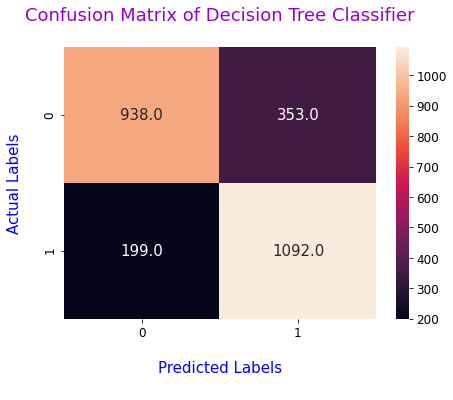


______________________________________________________________________________________


Visualizing the Decision Tree:-


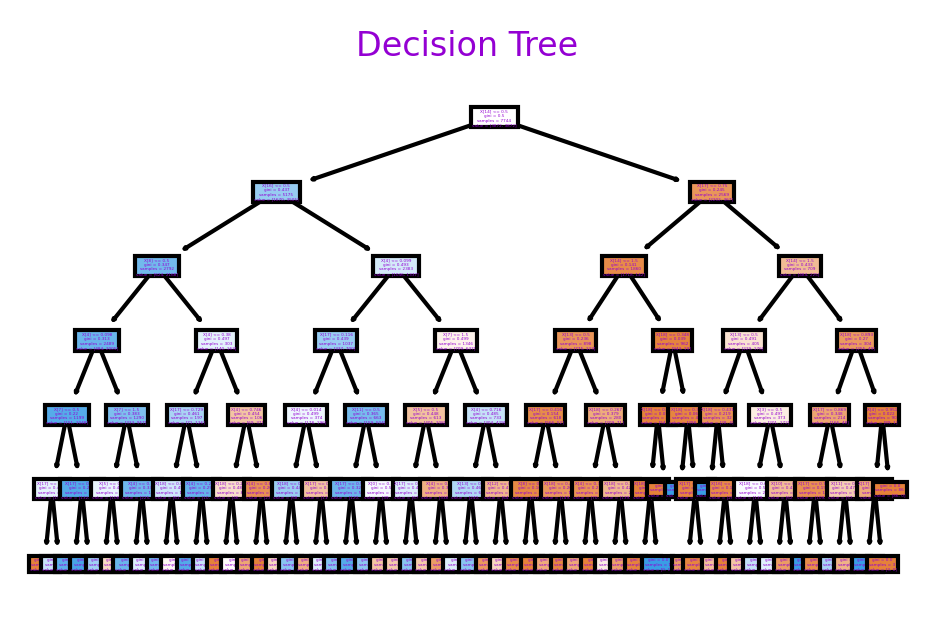

In [68]:
# Building Decision Tree Classifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=5)
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

# Getting Accuracies for train and test data
Train_AC = DT.score(X_train, y_train)
Test_AC = DT.score(X_test, y_test)

# Displaying Decision Tree Classifier model accuracies for train and test Data
print('\033[1mTable Showing Decision Tree Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Decision Tree Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

print('\n______________________________________________________________________________________\n')

# Building Confusion Matrix for Naive Bayes Model
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Naive Bayes Model
print('\033[1m\nHeatmap Showing Performance of Decision Tree Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Decision Tree Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

print('\n______________________________________________________________________________________\n')

# Visualizing the Decision Tree
print('\033[1m\nVisualizing the Decision Tree:-')
plt.subplots(figsize = (3.7,2.3), dpi=300)
plot_tree(DT, filled=True)
plt.title('Decision Tree', fontdict={'fontsize':8})
plt.show()                              # If plt.show() doesn't work, use "fig.savefig('DecisionTree.png')" to save then load.

***
**Key Observations:-**
* Decision Tree Classifier Model is designed and trained.
* Accuracies of train and test data are almost equal.
* Confusion matrics showing quiet good predictions.
* Decision Tree diagram is good.
***

### Building Bagging Classifier


Heatmap Showing Performance of Bagging Classifier:-


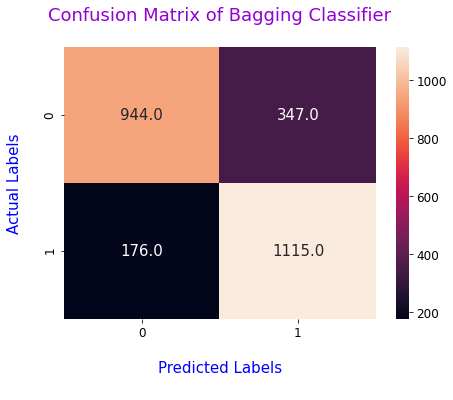

In [69]:
# Building Bagging Classifier
BC = BaggingClassifier(base_estimator=DT, n_estimators=14, random_state=1)
BC.fit(X_train, y_train)
y_predict = BC.predict(X_test)

# Getting Accuracies for train and test data
BCAC1 = BC.score(X_train , y_train)
BCAC2 = BC.score(X_test , y_test)

# Building Confusion Matrix for Bagging Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Bagging Classifier
print('\033[1m\nHeatmap Showing Performance of Bagging Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Bagging Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* Bagging Classifier Model is designed and trained.
***

### Building AdaBoost Classifier


Heatmap Showing Performance of AdaBoost Classifier:-


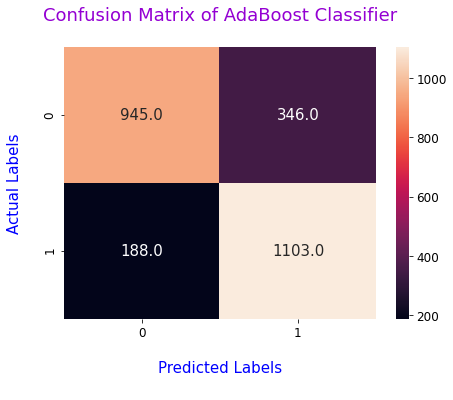

In [70]:
# Building AdaBoost Classifier
AB = AdaBoostClassifier(n_estimators=100, random_state=1)
AB.fit(X_train, y_train)
y_predict = AB.predict(X_test)

# Getting Accuracies for train and test data
ABAC1 = AB.score(X_train , y_train)
ABAC2 = AB.score(X_test , y_test)

# Building Confusion Matrix for AdaBoost Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for AdaBoost Classifier
print('\033[1m\nHeatmap Showing Performance of AdaBoost Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of AdaBoost Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* AdaBoost Classifier Model is designed and trained.
***

### Building Gradient Boosting Classifier


Heatmap Showing Performance of Gradient Boosting Classifier:-


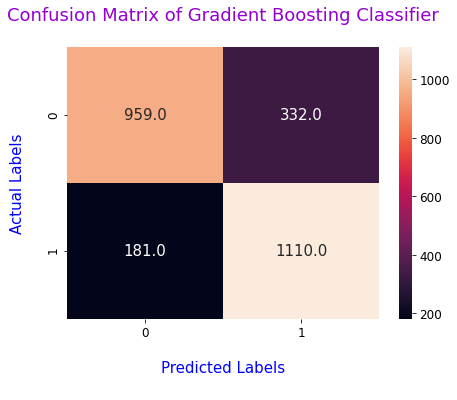

In [71]:
# Building Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators = 55,random_state=1)
GB.fit(X_train, y_train)
y_predict = GB.predict(X_test)

# Getting Accuracies for train and test data
GBAC1 = GB.score(X_train , y_train)
GBAC2 = GB.score(X_test , y_test)

# Building Confusion Matrix for Gradient Boosting Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Gradient Boosting Classifier
print('\033[1m\nHeatmap Showing Performance of Gradient Boosting Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Gradient Boosting Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* Gradient Boosting Classifier Model is designed and trained.
***

### Building RandomForest Classifier


Heatmap Showing Performance of RandomForest Classifier:-


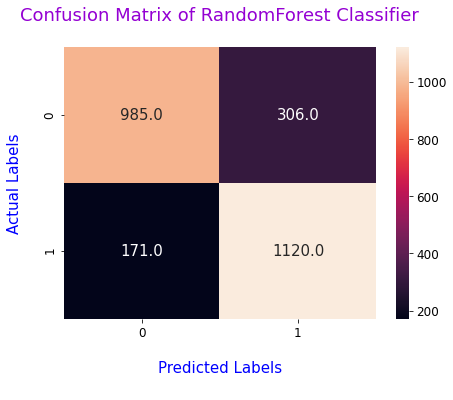

In [72]:
# Building RandomForest Classifier
RF = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=7, max_features=12)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

# Getting Accuracies for train and test data
RFAC1 = RF.score(X_train , y_train)
RFAC2 = RF.score(X_test , y_test)

# Building Confusion Matrix for RandomForest Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for RandomForest Classifier
print('\033[1m\nHeatmap Showing Performance of RandomForest Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of RandomForest Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* RandomForest Classifier Model is designed and trained.
***

### Building Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 

Here we build,
 1. LogisticRegression()
 2. SVC()
 3. DecisionTreeClassifier()

All the models are pre-checked to give best accuracies. Then we us these models to build our Voting Classifier


Heatmap Showing Performance of Voting Classifier:-


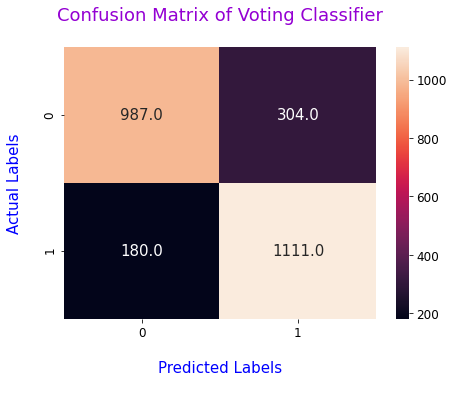

In [73]:
# Creating an empty set and a set of models
models1 = []
models2 = [DT, LogisticRegression(random_state=1,C=100), SVC(gamma='auto',random_state=1,C=10)]

# Appending models to empty set
for i in models2:
    models1.append((f'{i}', i))

# Building Voting Classifier model
VC = VotingClassifier(models1)
VC.fit(X_train,y_train)
y_predict = VC.predict(X_test)

# Getting Accuracies for train and test data
VCAC1 = VC.score(X_train , y_train)
VCAC2 = VC.score(X_test , y_test)

# Building Confusion Matrix for Voting Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Voting Classifier
print('\033[1m\nHeatmap Showing Performance of Voting Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Voting Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

***
**Key Observations:-**
* Voting Classifier Model is designed and trained.
***

### <span style="color:#9400D3"> * Display the Classification Accuracies for Train and Test Data.
* Accuracy is the number of correct predictions made by the model by the total number of records.

In [74]:
# Getting Models and Accuracies in lists
M = ['Bagging Classifier','AdaBoost Classifier','Gradient Boosting Classifier','RandomForest Classifier','Voting Classifier']
Train = list(map(lambda x: round(x*100,2) , [BCAC1, ABAC1, GBAC1, RFAC1, VCAC1]))
Test = list(map(lambda x: round(x*100,2) , [BCAC2, ABAC2, GBAC2, RFAC2, VCAC2]))

# Displaying Classification Accuracies of Ensemble Models for Train and Test Data.
print('\033[1mTable Showing Ensemble Models Classification Accuracies for Train and Test Data:-')
all_models1 = pd.DataFrame({'Ensemble Models':M,'Train Accuracy (%)':Train,'Test Accuracy (%)':Test}
                          ).set_index('Ensemble Models')
display(all_models1)

Table Showing Ensemble Models Classification Accuracies for Train and Test Data:-


Train Accuracy (%)  Test Accuracy (%)
Ensemble Models                                                    
Bagging Classifier                         81.04              79.74
AdaBoost Classifier                        79.49              79.32
Gradient Boosting Classifier               80.18              80.13
RandomForest Classifier                    82.93              81.53
Voting Classifier                          81.79              81.25

***
**Key Observations:-**
* In all models train accuracy are almost eaual to test accuracy.
* Bagging and AdaBoost classifiers have got almost same values for train and test accuracies.
* RandomForest Classifier has highest accuracy when compared to other models.
***

### <span style="color:#9400D3"> * Apply all the possible Tuning Techniques to Train the best model for the given data.
* <span style="color:#9400D3"> **Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.**

**List of different Models Applied to our Data:-**
  1. DecisionTreeClassifier('gini')
  2. DecisionTreeClassifier('entropy')
  3. RandomForestClassifier('gini')
  4. RandomForestClassifier('entropy')
  5. LogisticRegression()
  6. GaussianNB()
  7. SVC('rbf')
  8. SVC('linear')
  9. KNeighborsClassifier()
  
All the models are pre-checked to give best accuracies

In [75]:
# Creating list of pre-checked models with best parameters
models = [DT, DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5), RF,
          RandomForestClassifier(criterion='entropy',n_estimators=50, random_state=1, max_depth=7, max_features=12),
          LogisticRegression(random_state=1,C=100), GaussianNB(), SVC(gamma='auto',random_state=1,C=10), 
          SVC(kernel='linear',gamma='auto',random_state=1,C=50), KNeighborsClassifier(metric='euclidean',n_neighbors=20)]
Train_Accuracy = []
Test_Accuracy = []

# Training models and getting accuracies for Train and Test Data
for i in models:
    i.fit(X_train,y_train)
    Train_Accuracy.append(round(i.score(X_train,y_train),4)*100)
    Test_Accuracy.append(round(i.score(X_test,y_test),4)*100)    

***
**Key Observations:-**
* Here we have applied 9 different tuning techniques.
* All the possible Tuning Techniques are applied for the data and Accuracies for Train and Test data are captured.
***

### <span style="color:#9400D3"> * Display and Compare all the Models designed with their Train and Test accuracies.

### Displaying Accuracies of Train and Test data for above Trained Models

In [76]:
# Displaying Accuracies of Train and Test Data for trained models
print('\033[1mTable Showing Accuracies of Train and Test Data from Varius Algorithms:-')
model = ['Decision Tree Classifier(gini)','Decision Tree Classifier(entropy)','Random Forest Classifier(gini)',
         'Random Forest Classifier(entropy)','Logistic Regression','Gaussian Naive Bayes','Support Vector Classifier(rbf)',
         'Support Vector Classifier(linear)','K-Neighbors Classifier']
all_models2 = pd.DataFrame({'Trained Model':model,'Train Accuracy (%)':Train_Accuracy,'Test Accuracy (%)':Test_Accuracy}
                         ).set_index('Trained Model')
display(all_models2)

Table Showing Accuracies of Train and Test Data from Varius Algorithms:-


Train Accuracy (%)  Test Accuracy (%)
Trained Model                                                           
Decision Tree Classifier(gini)                  79.55              78.62
Decision Tree Classifier(entropy)               79.39              78.70
Random Forest Classifier(gini)                  82.93              81.53
Random Forest Classifier(entropy)               82.24              80.79
Logistic Regression                             80.06              80.64
Gaussian Naive Bayes                            76.60              77.65
Support Vector Classifier(rbf)                  81.96              81.18
Support Vector Classifier(linear)               80.09              80.52
K-Neighbors Classifier                          79.82              79.09

### Comparing Accuracies of Train and Test data for All the Trained Models so far.

In [77]:
# Comparing Accuracies of Train and Test data for All the Trained Models so far
print('\033[1mComparing Accuracies of Train and Test Data for All the Trained Models so far:-')
all_models1.drop('RandomForest Classifier',inplace=True)
display(all_models1.append(all_models2))

Comparing Accuracies of Train and Test Data for All the Trained Models so far:-


Train Accuracy (%)  Test Accuracy (%)
Bagging Classifier                              81.04              79.74
AdaBoost Classifier                             79.49              79.32
Gradient Boosting Classifier                    80.18              80.13
Voting Classifier                               81.79              81.25
Decision Tree Classifier(gini)                  79.55              78.62
Decision Tree Classifier(entropy)               79.39              78.70
Random Forest Classifier(gini)                  82.93              81.53
Random Forest Classifier(entropy)               82.24              80.79
Logistic Regression                             80.06              80.64
Gaussian Naive Bayes                            76.60              77.65
Support Vector Classifier(rbf)                  81.96              81.18
Support Vector Classifier(linear)               80.09              80.52
K-Neighbors Classifier                          79.82              79.09

***
**Key Observations:-**
* In all models train accuracy are almost eaual to test accuracy.
* RandomForest Classifier(gini) has highest accuracy when compared to other models.
***

### <span style="color:#9400D3"> * Select the Final Best Trained Model along with your detailed comments for selecting this model.
    
Based on above results, RandomForest Classifier(gini) has highest accuracies for train and test data.

### Checking Classification Report for RandomForest Classifier(gini)

In [78]:
# Getting Classification Report for RandomForest Classifier(gini) Model 
RF_Predict = RF.predict(X_test)
RFCR = metrics.classification_report(y_test, RF_Predict, output_dict=True)

# Displaying RandomForest Classifier(gini) Model Classification Report
print('\033[1m\nTable Showing RandomForest Classifier(gini) Model Classification Report:-')
display(pd.DataFrame(RFCR))


Table Showing RandomForest Classifier(gini) Model Classification Report:-


0            1  accuracy    macro avg  weighted avg
precision     0.852076     0.785414  0.815259     0.818745      0.818745
recall        0.762974     0.867545  0.815259     0.815259      0.815259
f1-score      0.805067     0.824439  0.815259     0.814753      0.814753
support    1291.000000  1291.000000  0.815259  2582.000000   2582.000000

### Checking Feature Importance of RandomForest Classifier(gini)

Plot showing Feature Importance of RandomForest Classifier(gini):-


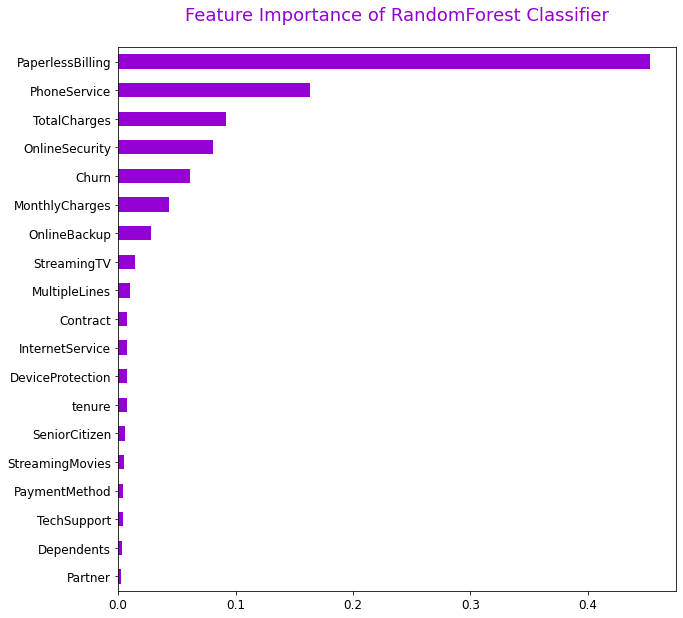

In [79]:
# Get Feature Importance from the RF classifier
fi = RF.feature_importances_

# Displaying Feature Importance
FI = pd.Series(fi, index=teledata.columns[1:]).sort_values()
print('\033[1mPlot showing Feature Importance of RandomForest Classifier(gini):-')
FI.plot(kind='barh', figsize=(10,10), color= '#9400D3')
plt.title('Feature Importance of RandomForest Classifier\n')
plt.show()

***
**Comments:-**
* Here Precision of class 0 is higher than class 1, whereas in recall its vice-versa.
* But we hava a well balanced f1-score, which is good.
* All three accuracies are almost equal.
* Accuracy we saw as highest among all.
* Also we saw the Confusion Matrix, which is predicting very well when compared to other ensemble models.

By observing above data, we select the **RandomForest Classifier (gini)** as our Final Best Trained Model.

### <span style="color:#9400D3"> * Pickle the selected model for future use.
Pickle is the standard way of serializing objects in Python.

### Method 1: Saving the Model in SAV File

Here we create a SAV file and save our Model in it.

In [80]:
# Creating file name
Pickle_file = 'PickleFile.sav'

# Saving the Final best trained Random Forest model to the file
pickle.dump(RF, open(Pickle_file, 'wb'))            # Here we use "dump"
  
# Loading the Pickle File to get Random Forest Model
RF_model1 = pickle.load(open(Pickle_file, 'rb'))    # Here we use "load"
  
# Checking the loaded model by finding accuracies
Train_AC = round(RF_model1.score(X_train , y_train),4)*100
Test_AC = round(RF_model1.score(X_test , y_test),4)*100

print('\033[1mTable Showing Random Forest Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Random Forest Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

Table Showing Random Forest Classifier Model Accuracies for Train and Test Data:-


Random Forest Classifier Accuracy (%)
Data                                           
Training                                  82.93
Testing                                   81.53

### Method 2: Saving the Model in a Variable

Incase if the above method fails due to error in loading file, you can check this method.

In [81]:
# Saving the Final best trained Random Forest model to a Variabe
Pickle_model = pickle.dumps(RF)                # Here we use "dumps" NOT "dump"
   
# Loading the Pickle Model
RF_model2 = pickle.loads(Pickle_model)         # Here we use "loads" NOT "load"
  
# Checking the loaded model by finding accuracies
Train_AC = round(RF_model2.score(X_train , y_train),4)*100
Test_AC = round(RF_model2.score(X_test , y_test),4)*100

print('\033[1mTable Showing Random Forest Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Random Forest Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

Table Showing Random Forest Classifier Model Accuracies for Train and Test Data:-


Random Forest Classifier Accuracy (%)
Data                                           
Training                                  82.93
Testing                                   81.53

## <span style="color:#9400D3">6. Conclusion and Improvisation:

### <span style="color:#9400D3"> * Write your Conclusion on the Results.
 
* According to the objective, we selected our Target Variable 'Churn' and based on this we build our models.
* We choosen pandas method to get raw data.
* Initially we wont find null values, but soon after changing the datatypes of quantitative attributes, we found 11 Null values in the data.
* We converted our categorical attributes both Manually and Automatically.
* Then we had done some statistical analysis, which includes some extra features like Analysis of Loyalty of Customers, Gender based Churn rate and Senior Citizen based Churn analysis.
* A detailed Univariate, Bivariate and Multivariate analysis is presented.
* We found Zero Outliers in the data.
* All Quantitative features are normalised before applying them to the models.
* There was imbalance in target attribute, which was fixed later.
* Then all the Ensemble models are build and Accuracies of train and test data are presented.
* All possible tuning techniques are applied to find best model.
* We found **Random Forest Model** as the best model for this data, which has highest accuracy among all models.
* At last we Pickled our final model in two methods.

### <span style="color:#9400D3"> * Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

* There was a imbalance in target variable, which is fixed using SMOTE.
* We Found Null values in Recorded Observations in TotalCharges Attribute.
* We found that about 72% of customers are loyal to the company. The company should concentrate more on customers loyalty.
* Customers who use company's services like Online Security, Backup etc, are very less. Reason for it should be found to resolve this.
* Majority of people use month-month plans. Which is noticeable.
* Paper Less Billing got highest Feature Importance.
* After observing each model that we build, we have selected **Random Forest Model** as our Final Best Model.
* It will give a very good prediction which will help the company.

**Closing Sentence:- The Predictions made by our models will help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.**

# <span style="color:#9400D3">--------------------- End of AIML MODULE PROJECT 3 ---------------------
  
------------------------------------------------------------------------------**THANK YOU😊**----------------------------------------------------------------------------------
    
***
***